In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pycountry

import dataframe_image as dfi


In [2]:
sns.set_style("darkgrid") #estilo do gráfico

#diretório para salvar imagens
path_salvar='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Comparativo/images/'



# Carregar Dados

## Dados Rankings

Será comparado o desempenho das universidades nos três rankings universitários mais antigos e influentes, são eles:

- World University Rankings publicado pela Times Higher Education (THE);
- QS World University Rankings publicado pela Quacquarelli Symonds (QS);
- Academic Ranking of World Universities publicado pela Shanghai Ranking Consultancy.




In [3]:
#Caminho onde estão as pastas com os dados
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/'

ranking_the         =pd.read_csv(path+'Rankings/times_higher_education_rankings.csv') #ranking THE
ranking_qs_2017_2022=pd.read_csv(path+'Rankings/qs_ranking_2017_2022.csv')            #dados para o raking qs entre 2017 e 2022
ranking_qs_2023_2025=pd.read_csv(path+'Rankings/qs_ranking_2023_2025.csv')            #dados para o raking qs entre 2023 2 2025
ranking_shanghai     =pd.read_csv(path+'Rankings/ranking_Shanghai.csv')               #dados para o ranking shanghai

## Dados Educacionais


Serão analisados dados educacionais dos países buscando entender o desempenho de suas universidades nos rankings globais.

Os dados incluem:

- Investimentos dos países em cada nível educacional (em milhoões de dólares e em porcentagem do PIB);
- Escolaridade média da população;
- Proporção do total de indivíduos em idade escolar matriculados em instituições de ensino.

- Fonte dos dados:

    - investimentos_publicos_privados : https://nces.ed.gov/programs/digest/d14/tables/dt14_605.20.asp
    - demais: http://data.uis.unesco.org/


In [4]:
#Caminho onde estão as pastas com os dados
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/'

In [5]:
#mean_year_schooling é a escolaridade média da população acima de 25 anos
#investimentos_publicos_privados contem o valor direto investido em educação pelos setores públicos e privados (em proporção do PIB)
#investimento_em_milhoes é o tatal investido (em milhões de dólares) em educação pelos setores públicos dos países


mean_year_schooling=pd.read_excel(path+'Mean_Years_Of_Schooling/mean_years.xlsx') #escolaridade média
investimentos_publicos_privados=pd.read_excel(path+'Public and private direct expenditures on education/public_private_expenditure.xlsx') #investimentos públicos e privados diretos em educação
investimento_em_milhoes=pd.read_excel(path+'Government expenditure on education in constant US$/gasto_educacao_ajustado_inflacao.xlsx') #investimento público em educação (milhões US$)


In [6]:
#Número total de alunos matriculados em cada nível educacional

matriculas_primario=pd.read_excel(path+'Enrollment-Number/enrollment-primary-education-number.xlsx') #total de alunos matriculados no ensino primário
matriculas_secundario=pd.read_excel(path+'Enrollment-Number/enrollment-secondary-education-number.xlsx') #total de alunos matriculados no ensino secundário
matriculas_tecnico=pd.read_excel(path+'Enrollment-Number/enrollment-post_secondary-non-terciary-education-number.xlsx') #total de alunos matriculados no ensino técnico
matriculas_universitario=pd.read_excel(path+'Enrollment-Number/enrollment-terciary-education-number.xlsx') #total de alunos matriculados no ensino terciário

In [7]:
#Proporcao do total de indivíduos na faixa etária correpondente que estão matriculadas nos ensino primário e secundário

proporcao_matriculados_primario=pd.read_excel(path+'Enrollment-Ratio/enrollment-ratio-primary.xlsx') #proporcao de matriculados no ensino primario
proporcao_matriculados_secundario=pd.read_excel(path+'Enrollment-Ratio/enrollment-ratio-upper-secondary.xlsx') #proporcao de matriculados no ensino médio

In [8]:
#Investimentos em cada nível educacional como proporcao do PIB

investimento_porcentagem_PIB_pre_primario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/pre-primario.xlsx') #investimento público em ensino pré-primário
investimento_porcentagem_PIB_primario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/primario.xlsx') #investimento público em ensino primário
investimento_porcentagem_PIB_secondary=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/secondary.xlsx') #investimento público em ensino secundário
investimento_porcentagem_PIB_tecnico=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/post-secondary-non-terciary.xlsx') #investimento público em ensino técnico
investimento_porcentagem_PIB_universitario=pd.read_excel(path+'Government expenditure on education as a percentage of GDP/terciary.xlsx') #investimento público em ensino universitário

# Pré-Processamento

## Dados Rankings

### Padronização dos nomes das colunas

In [9]:
#Padronização do nome das colunas para facilitar a comparação
#Ranking Times Higher Education

ranking_the.columns


Index(['Year', 'rank_order', 'rank', 'name', 'scores_overall',
       'scores_overall_rank', 'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'stats_proportion_of_isr', 'male proportion',
       'female proportion'],
      dtype='object')

In [10]:
#Ranking QS

ranking_qs_2017_2022.columns

Index(['Institution Name', 'year', 'Overall Score Rank', 'Overall Score',
       'link', 'Country', 'city', 'region', 'logo', 'type', 'research_output',
       'student_faculty_ratio', 'international_students', 'Size',
       'faculty_count'],
      dtype='object')

In [11]:
#Ranking QS

ranking_qs_2023_2025.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Country Code', 'Country',
       'Size', 'Academic Reputation Score', 'Employer Reputation Score',
       'Faculty Student Score', 'Citations per Faculty Score',
       'International Faculty Score', 'International Students Score',
       'International Research Network Score', 'Employment Outcomes Score',
       'Sustainability Score', 'Overall Score', 'Academic Reputation Rank',
       'Employer Reputation Rank', 'Faculty Student Rank',
       'Citations per Faculty Rank', 'International Faculty Rank',
       'International Students Rank', 'International Research Network Rank',
       'Employment Outcomes Rank', 'Sustainability Rank', 'Overall Score Rank',
       'year', '2024 RANK', '2023 RANK', 'FOCUS', 'RES.', 'AGE', 'STATUS',
       'Rank'],
      dtype='object')

In [12]:
#Ranking Shanghai

ranking_shanghai.columns

Index(['World Rank', 'Institution', 'Country', 'Regional Rank', 'Total Score',
       'Alumni', 'Award', 'HiCi', 'N&S', 'PUB', 'PCP', 'Year',
       'Country_Names'],
      dtype='object')

In [13]:
#Nomes iguais para as colunas com os mesmos dados em rankings diferentes

ranking_the.rename(columns={'name':'Institution','location':'Country','scores_overall':'Overall Score'},inplace=True)
ranking_qs_2017_2022.rename(columns={'Institution Name':'Institution','year':'Year'},inplace=True)
ranking_qs_2023_2025.rename(columns={'Institution Name':'Institution','year':'Year'},inplace=True)
ranking_shanghai.rename(columns={'Total Score':'Overall Score','Country':'Country Code','Country_Names':'Country'},inplace=True)
ranking_the.rename(columns={'rank':'World Rank'},inplace=True)
ranking_qs_2017_2022.rename(columns={'Overall Score Rank':'World Rank'},inplace=True)
ranking_qs_2023_2025.rename(columns={'Overall Score Rank':'World Rank'},inplace=True)

### Padronizar nomes de alguns paises

O nome de alguns paises aparecem de forma diferentes nos três rankings. É necessária uma padronização para facilitar a comparação.


In [14]:
ranking_the["Country"]=ranking_the["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_qs_2017_2022["Country"]=ranking_qs_2017_2022["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_qs_2023_2025["Country"]=ranking_qs_2023_2025["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

ranking_shanghai["Country"]=ranking_shanghai["Country"].replace({"Korea, Republic of":'South Korea',
                                'China (Mainland)':'China',
                                'Hong Kong SAR':'Hong Kong',
                                'Russia':'Russian Federation'})

### Adicionar Códigos dos Paises

Os códigos dos países são necessários para plotagem de mapas 

In [15]:
#Lookup table que relaciona nomes de países com seus respectivos códigos
#A biblioteca pycountry será usada para obter os códigos dos países, o lookup table será usada para os países para os quais a biblioteca não conseguiu encontrar o código



lookup_table_codigos_paises={'United States of America':"USA",
    'United Kingdom of Great Britain and Northern Ireland':"GRB",
    'China, Hong Kong Special Administrative Region':'HKG',
    'Palestine':"PSE",
    'Wallis and Futuna Islands':"WLF",
    'Venezuela (Bolivarian Republic of)':"VEN",
    'United States Virgin Islands':"VIR",
    'United Republic of Tanzania':'TZA',
    'Svalbard and Jan Mayen Islands':'SJM',
    'Saint-Martin (French part)':'MAF',
    'Saint-Barthélemy':'BLM',
    'Saint Helena':'SHN',
    'Republic of Moldova':'MDA',
    'Republic of Korea':'KOR',
    'Micronesia (Federated States of)':'FSM',
    'Iran (Islamic Republic of)':'IRN',
    'Holy See':'VAT',
    'Faeroe Islands':'FRO',
    'Democratic Republic of the Congo':'COD',
    "Democratic People's Republic of Korea":'PRK',
    'China, Macao Special Administrative Region':"MAC",
    'British Virgin Islands':'Virgin',
    'Bolivia (Plurinational State of)':'BOL',
    'South Korea':"KOR",
    'Taiwan':'TWN',
    'Turkey':'TUR',
    'Moldova': 'MDA',
    'Iran':'IRN',
    'Bolivia':"BOL",
    'Czech Republic':'CZE',
    'Venezuela':'VEN',
    'Vietnam':'VNM',
    'Tanzania':'TZA',
    'Northern Cyprus':'CYP',
    'Kosovo':"UNK",
    'Russia':'RUS',
    'China (Mainland)':'CHN',
    'Hong Kong SAR':'HKG',
    'Hong Kong':'HKG',
    'Palestinian Territory, Occupied':'PSE',
    'Brunei':'BRN',
    'Macau SAR':'MAC',
    'United Kingdom':"GBR",
    'Macao':'MAC',
    'Slovak Republic':'SVK'}	


In [16]:
#Função para adicionar a um dataframe contendo uma coluna com os nomes dos paises uma nova coluna contendos os códigos dos respectivos paises

def criar_coluna_codigo_paises(df,lookup_table=lookup_table_codigos_paises,coluna_paises='Country',coluna_codigos='Codigo Paises'):
    '''
    Função para adicionar uma coluna com os códigos dos países. Usará uma coluna com os nomes dos paises para criar um nova coluna
    com os códigos dos países

    Inputs:
        df - (Pandas Dataframe) dataframe com o ranking de uma das instituições
        lookup_table - (dict) Dicionário onde as chaves são nomes dos países não encontrados pela biblioteca pycountry. Os values do dicionário são os códigos dos países
        coluna_paises - (str) Nome da coluna no dataframe onde estão os nomes dos países
        coluna_codigos - (str) Nome da nova coluna que será criada que receberá os códigos dos países

    Outputs:
        df - (Pandas dataframe) df original com a adição de uma coluna 
    '''
    
    codigos=[]
    for nome_pais in df[coluna_paises]:
        try:
            codigos.append(pycountry.countries.get(name=nome_pais).alpha_3) #buscar o codigo com a biblioteca pycountry
        except:
            try:
                codigos.append(lookup_table[nome_pais]) #não encontrados pelo pycountry serão buscados na lookuop table
            except:
                codigos.append(None) #não encontrados pelo pycountry nem pelo lookup table receberá None
    df[coluna_codigos]=codigos
    return df

In [17]:
#Adicionar coluna com os códigos dos países
#Ranking THE

ranking_the=criar_coluna_codigo_paises(ranking_the,lookup_table_codigos_paises)


In [18]:
#Adicionar coluna com os códigos dos países
#Ranking QS

ranking_qs_2017_2022=criar_coluna_codigo_paises(ranking_qs_2017_2022,lookup_table_codigos_paises)
ranking_qs_2023_2025=criar_coluna_codigo_paises(ranking_qs_2023_2025,lookup_table_codigos_paises)

In [19]:
#Adicionar coluna com os códigos dos países
#Ranking Shanghai

ranking_shanghai=criar_coluna_codigo_paises(ranking_shanghai,lookup_table_codigos_paises)


### Padronização dos nomes das Instituições

Mesma instituição com nomes estritos de forma diferente em rankings diferentes:

- California Institute of Technology e California Institute of Technology (Caltech)	


- Massachusetts Institute of Technology (MIT) e Massachusetts Institute of Technology


In [20]:
ranking_the.replace({'California Institute of Technology':'California Institute of Technology (Caltech)',
                     'Massachusetts Institute of Technology':'Massachusetts Institute of Technology (MIT)'},inplace=True)

ranking_shanghai.replace({'California Institute of Technology':'California Institute of Technology (Caltech)'},inplace=True)

### Remover espaços do inicio e final de strings 

In [21]:
ranking_the["Institution"]=ranking_the["Institution"].str.strip()
ranking_qs_2017_2022["Institution"]=ranking_qs_2017_2022["Institution"].str.strip()
ranking_qs_2023_2025["Institution"]=ranking_qs_2023_2025["Institution"].str.strip()
ranking_shanghai["Institution"]=ranking_shanghai["Institution"].str.strip()

## Dados Educacionais

In [22]:
#Em dados provenientes da Unesco nos valores ausentes está a string ".."
#Substituir a string por NAN para permitir operações matemáticas nas colunas

#A função foi criada para evitar problemas com downcasting no uso do replace. Para maiores informações consultar o link:
#https://medium.com/@felipecaballero/deciphering-the-cryptic-futurewarning-for-fillna-in-pandas-2-01deb4e411a1

def replace_string_nan_unesco(x):
    with pd.option_context('future.no_silent_downcasting', True):
        x.replace('..',np.nan,inplace=True)
    return x


### Escolaridade média

In [23]:
#Escolaridade média (em anos) para pessoas acima de 25 anos

mean_year_schooling=replace_string_nan_unesco(mean_year_schooling)
mean_year_schooling.head()

,Country,2017,2018,2019,2020,2021,2022,2023
0,Estonia,13.55548,13.65631,NaN,13.54843,NaN,NaN,NaN
1,United States of America,13.41329,13.50162,NaN,13.68343,13.5755,13.9142,NaN
2,Lithuania,13.18839,NaN,NaN,13.4981,NaN,NaN,NaN
3,United Kingdom of Great Britain and Northern I...,13.16133,NaN,NaN,13.40612,13.4929,NaN,NaN
4,Norway,12.94716,NaN,13.00363,NaN,NaN,NaN,NaN


In [24]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  279 non-null    object
 1   2017     63 non-null     object
 2   2018     67 non-null     object
 3   2019     70 non-null     object
 4   2020     56 non-null     object
 5   2021     23 non-null     object
 6   2022     28 non-null     object
 7   2023     1 non-null      object
dtypes: object(8)
memory usage: 17.6+ KB


In [25]:
mean_year_schooling.iloc[3,0]

'United Kingdom of Great Britain and Northern Ireland'

In [26]:
#Padronizar nome de alguns paises

mean_year_schooling=mean_year_schooling.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})


/tmp/ipykernel_16970/3595464365.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_year_schooling=mean_year_schooling.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})


In [27]:
#Conversão dos dados na colunas com as idades média para formato numérico

mean_year_schooling.set_index('Country',inplace=True)
mean_year_schooling=mean_year_schooling.apply(lambda x:pd.to_numeric(x))
mean_year_schooling.reset_index(inplace=True)
mean_year_schooling

,Country,2017,2018,2019,2020,2021,2022,2023
0,Estonia,13.55548,13.65631,NaN,13.54843,NaN,NaN,NaN
1,United States of America,13.41329,13.50162,NaN,13.68343,13.57550,13.91420,NaN
2,Lithuania,13.18839,NaN,NaN,13.49810,NaN,NaN,NaN
3,United Kingdom,13.16133,NaN,NaN,13.40612,13.49290,NaN,NaN
4,Norway,12.94716,NaN,13.00363,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
274,Andorra,NaN,NaN,NaN,NaN,NaN,11.61344,NaN
275,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,Algeria,NaN,NaN,7.02027,NaN,NaN,NaN,NaN
277,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   2017     63 non-null     float64
 2   2018     67 non-null     float64
 3   2019     70 non-null     float64
 4   2020     56 non-null     float64
 5   2021     23 non-null     float64
 6   2022     28 non-null     float64
 7   2023     1 non-null      float64
dtypes: float64(7), object(1)
memory usage: 17.6+ KB


In [29]:
#Adição de uma coluna com códigos dos países para permitir plotagem dos mapas

mean_year_schooling=criar_coluna_codigo_paises(mean_year_schooling)

### Número Total de Matriculados

In [30]:
#Total de alunos matriculados em cada nivel educacinal
#Dados estão em 4 dataframes, um para cada nivel educacional
#Criar um coluna em cada dataframe para permitir a concatenação em um único dataframe. Na coluna criada será informado o nível educacional

matriculas_primario["Nivel de Ensino"]='Primario'
matriculas_secundario['Nivel de Ensino']='Secundario'
matriculas_tecnico['Nivel de Ensino']='Tecnico'
matriculas_universitario['Nivel de Ensino']='Universitario'

numero_matriculados=pd.concat([matriculas_primario,matriculas_secundario,matriculas_tecnico,matriculas_universitario],axis=0) #dataframe com os dados para os 4 niveis educacionais

#Substituir strings nos valores ausentes
numero_matriculados=replace_string_nan_unesco(numero_matriculados)
numero_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Afghanistan,6350404,6544906,6777785,NaN,NaN,NaN,NaN,Primario
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
2,Albania,174836,170861,167104,162170,158528,154140,NaN,Primario
3,Algeria,4283207,4429994,4580288,4852322,4852322,5050667,5187616,Primario
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario


In [31]:
#remover dataframes para liberar memória

del(matriculas_primario)
del(matriculas_secundario)
del(matriculas_tecnico)
del(matriculas_universitario)


In [32]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1116 non-null   object
 1   2017             689 non-null    object
 2   2018             689 non-null    object
 3   2019             685 non-null    object
 4   2020             667 non-null    object
 5   2021             646 non-null    object
 6   2022             485 non-null    object
 7   2023             52 non-null     object
 8   Nivel de Ensino  1116 non-null   object
dtypes: object(9)
memory usage: 87.2+ KB


In [33]:
#Converter as colunas com os números de alunos para o formato numérico

numero_matriculados=numero_matriculados.astype({col:'float64' for col in range(2017,2024)})

In [34]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1116 non-null   object 
 1   2017             689 non-null    float64
 2   2018             689 non-null    float64
 3   2019             685 non-null    float64
 4   2020             667 non-null    float64
 5   2021             646 non-null    float64
 6   2022             485 non-null    float64
 7   2023             52 non-null     float64
 8   Nivel de Ensino  1116 non-null   object 
dtypes: float64(7), object(2)
memory usage: 87.2+ KB


In [35]:
#Adicionar coluna com os códigos dos países

numero_matriculados=criar_coluna_codigo_paises(numero_matriculados)

### Proporção de indivíduos matriculados

In [36]:
#Proporção de alunos matriculados nos ensinos primário e secundários
#Criar nova coluna para permitir concatenação dos dados

proporcao_matriculados_primario['Nivel de Ensino']='Primario'
proporcao_matriculados_secundario['Nivel de Ensino']='Secundario'

proporcao_matriculados=pd.concat([proporcao_matriculados_primario,proporcao_matriculados_secundario],axis=0) #datadrame com os dados para os dois niveis educacionais

In [37]:
#Remover dataframe para liberar memória
del(proporcao_matriculados_primario)
del(proporcao_matriculados_secundario)

In [38]:
proporcao_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Afghanistan,..,..,..,..,..,..,..,Primario
1,Åland Islands,..,..,..,..,..,..,..,Primario
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,..,Primario
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario
4,American Samoa,..,..,..,..,..,..,..,Primario


In [39]:
proporcao_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          558 non-null    object
 1   2017             558 non-null    object
 2   2018             558 non-null    object
 3   2019             558 non-null    object
 4   2020             558 non-null    object
 5   2021             558 non-null    object
 6   2022             558 non-null    object
 7   2023             558 non-null    object
 8   Nivel de Ensino  558 non-null    object
dtypes: object(9)
memory usage: 43.6+ KB


In [40]:
#Conversão das colunas com os dados das proporções para o formato numérico

proporcao_matriculados=replace_string_nan_unesco(proporcao_matriculados)
proporcao_matriculados=proporcao_matriculados.astype({col:'float64' for col in range(2017,2024)})

In [41]:
proporcao_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          558 non-null    object 
 1   2017             289 non-null    float64
 2   2018             284 non-null    float64
 3   2019             280 non-null    float64
 4   2020             283 non-null    float64
 5   2021             282 non-null    float64
 6   2022             200 non-null    float64
 7   2023             28 non-null     float64
 8   Nivel de Ensino  558 non-null    object 
dtypes: float64(7), object(2)
memory usage: 43.6+ KB


In [42]:
#Adicionar coluna com os códigos dos países

proporcao_matriculados=criar_coluna_codigo_paises(proporcao_matriculados)

### Investimentos em educação como proporção do PIB


In [43]:
#Criação de nova coluna para idenfificar o nivel educacional
#Necessária pra concatenação dos dados

investimento_porcentagem_PIB_pre_primario['Nivel de Ensino']    ='Pre-Primario'
investimento_porcentagem_PIB_primario['Nivel de Ensino']        ='Primario'
investimento_porcentagem_PIB_secondary['Nivel de Ensino']       ='Secundario'
investimento_porcentagem_PIB_tecnico['Nivel de Ensino']         ='Tecnico'
investimento_porcentagem_PIB_universitario['Nivel de Ensino']   ='Universitario'

investimento_porcentagem_PIB=pd.concat([investimento_porcentagem_PIB_pre_primario, #dataframe com os dados para os cinco níveis educacionais
                                investimento_porcentagem_PIB_primario,                                
                                investimento_porcentagem_PIB_secondary,
                                investimento_porcentagem_PIB_tecnico,
                                investimento_porcentagem_PIB_universitario],axis=0)

In [44]:
#Remover dataframes para liberar memória

del(investimento_porcentagem_PIB_pre_primario)
del(investimento_porcentagem_PIB_primario)
del(investimento_porcentagem_PIB_secondary)
del(investimento_porcentagem_PIB_tecnico)
del(investimento_porcentagem_PIB_universitario)

In [45]:
investimento_porcentagem_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1396 non-null   object
 1   2017             1395 non-null   object
 2   2018             1395 non-null   object
 3   2019             1395 non-null   object
 4   2020             1395 non-null   object
 5   2021             1395 non-null   object
 6   2022             1395 non-null   object
 7   2023             1395 non-null   object
 8   Nivel de Ensino  1396 non-null   object
dtypes: object(9)
memory usage: 109.1+ KB


In [46]:
investimento_porcentagem_PIB.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino
0,Republic of Moldova,1.31753,1.34942,1.47847,1.56519,1.46903,1.55889,..,Pre-Primario
1,Sweden,1.2093,1.2122,1.11929,1.14501,..,..,..,Pre-Primario
2,Belarus,1.14853,..,1.1827,1.19771,1.10662,..,..,Pre-Primario
3,Mongolia,1.013,0.996,0.972,1.274,0.986,1.274,..,Pre-Primario
4,Ukraine,0.94626,0.8928,0.90628,0.88962,..,..,..,Pre-Primario


In [47]:
#Conversão dos dados para formato numérico

investimento_porcentagem_PIB=replace_string_nan_unesco(investimento_porcentagem_PIB)
investimento_porcentagem_PIB=investimento_porcentagem_PIB.astype({col:'float64' for col in range(2017,2024)})

In [48]:
investimento_porcentagem_PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396 entries, 0 to 278
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1396 non-null   object 
 1   2017             454 non-null    float64
 2   2018             446 non-null    float64
 3   2019             454 non-null    float64
 4   2020             431 non-null    float64
 5   2021             275 non-null    float64
 6   2022             199 non-null    float64
 7   2023             10 non-null     float64
 8   Nivel de Ensino  1396 non-null   object 
dtypes: float64(7), object(2)
memory usage: 109.1+ KB


In [49]:
#Adicionar coluna com os códigos dos países

investimento_porcentagem_PIB=criar_coluna_codigo_paises(investimento_porcentagem_PIB)

### Investimentos em educação (em milhões de dólares)

In [50]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  279 non-null    object
 1   2017     279 non-null    object
 2   2018     279 non-null    object
 3   2019     279 non-null    object
 4   2020     279 non-null    object
 5   2021     279 non-null    object
 6   2022     279 non-null    object
 7   2023     279 non-null    object
dtypes: object(8)
memory usage: 17.6+ KB


In [51]:
investimento_em_milhoes.head()

,Country,2017,2018,2019,2020,2021,2022,2023
0,United States of America,1030585.97051,1013790.52851,1056013.45324,1177315.07611,..,..,..
1,Germany,205772.6723,212376.72756,220544.70881,231934.70861,..,..,..
2,France,157799.48292,159432.67884,160787.32274,157226.34319,..,..,..
3,United Kingdom of Great Britain and Northern I...,155964.56289,152915.81974,157038.35916,167126.74487,..,..,..
4,India,103435.93486,111960.25781,106446.97069,121803.35176,123832.22685,..,..


In [52]:
# Padronização do nome de alguns países

investimento_em_milhoes.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                                'China, Hong Kong Special Administrative Region':'Hong Kong',
                                'China, Macao Special Administrative Region':'Macao'},inplace=True)


In [53]:
#Conversão dos dados para formato numérico

investimento_em_milhoes=replace_string_nan_unesco(investimento_em_milhoes)
investimento_em_milhoes=investimento_em_milhoes.astype({col:'float64' for col in range(2017,2024)})

In [54]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  279 non-null    object 
 1   2017     123 non-null    float64
 2   2018     110 non-null    float64
 3   2019     90 non-null     float64
 4   2020     80 non-null     float64
 5   2021     43 non-null     float64
 6   2022     24 non-null     float64
 7   2023     0 non-null      float64
dtypes: float64(7), object(1)
memory usage: 17.6+ KB


In [55]:
investimento_em_milhoes.head()


,Country,2017,2018,2019,2020,2021,2022,2023
0,United States of America,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN
1,Germany,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN
2,France,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN
3,United Kingdom,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN
4,India,1.034359e+05,1.119603e+05,1.064470e+05,1.218034e+05,123832.22685,NaN,NaN


In [56]:
#Adicionar coluna com códigos dos paises

investimento_em_milhoes=criar_coluna_codigo_paises(investimento_em_milhoes)

### Investimentos públicos e privados diretos em educação (em porcentagem do PIB)  

In [57]:
investimentos_publicos_privados.head()

,Country,Ano,Gastos Governamentais Totais,Gastros Privados Totais,Gastos Governamentais em Educacao Elementar e Secundaria,Gastos Privados em Educacao Elementar e Secundaria,Gastos Governamentais em Educacao Superior,Gastos Privados em Educacao Superior
0,OECD average,2005,4.3,---,3.3,---,1,---
1,Australia,2005,3.9,---,3.2,---,0.7,---
2,Austria,2005,---,---,---,---,---,---
3,Belgium,2005,5,---,3.9,---,1.1,---
4,Canada,2005,4.4,---,3.1,---,1.3,---


In [58]:
# Corrigir nome coluna

investimentos_publicos_privados.rename(columns={'Gastos Governamentais Totais':'Investimentos Governamentais Totais',
'Gastros Privados Totais':'Investimentos Privados Totais',
'Gastos Governamentais em Educacao Elementar e Secundaria':'Investimentos Governamentais em Educacao Elementar e Secundaria',
       'Gastos Privados em Educacao Elementar e Secundaria':'Investimentos Privados em Educacao Elementar e Secundaria',
       'Gastos Governamentais em Educacao Superior':'Investimentos Governamentais em Educacao Superior',
       'Gastos Privados em Educacao Superior':'Investimentos Privados em Educacao Superior'
 },inplace=True)


In [59]:
#Remover espaços vazios nos começos e finais de strings

investimentos_publicos_privados['Country']=investimentos_publicos_privados['Country'].str.strip()



In [60]:
investimentos_publicos_privados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Country                                                          282 non-null    object
 1   Ano                                                              282 non-null    int64 
 2   Investimentos Governamentais Totais                              282 non-null    object
 3   Investimentos Privados Totais                                    282 non-null    object
 4   Investimentos Governamentais em Educacao Elementar e Secundaria  282 non-null    object
 5   Investimentos Privados em Educacao Elementar e Secundaria        282 non-null    object
 6   Investimentos Governamentais em Educacao Superior                282 non-null    object
 7   Investimentos Privados em Educacao Superior           

In [61]:
#Os valores ausentes deste conjunto de dados (o único que não foi baixado do site da Unesco) nos valores ausentes está a string '---'
#Em alguns casos nos valores ausentes está o simbolo '#'
#Substituir essas duas strings por np.nan para permitir operações matemáticas nas colunas

with pd.option_context('future.no_silent_downcasting', True):
    investimentos_publicos_privados.replace('---',np.nan,inplace=True)

with pd.option_context('future.no_silent_downcasting', True):
    investimentos_publicos_privados.replace('#',np.nan,inplace=True)

In [62]:
# Converter colunas para formato numérico

investimentos_publicos_privados=investimentos_publicos_privados.astype({col:'float64' for col in investimentos_publicos_privados.columns if col not in ['Country','Ano']})

In [63]:
investimentos_publicos_privados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          282 non-null    object 
 1   Ano                                                              282 non-null    int64  
 2   Investimentos Governamentais Totais                              243 non-null    float64
 3   Investimentos Privados Totais                                    36 non-null     float64
 4   Investimentos Governamentais em Educacao Elementar e Secundaria  248 non-null    float64
 5   Investimentos Privados em Educacao Elementar e Secundaria        34 non-null     float64
 6   Investimentos Governamentais em Educacao Superior                245 non-null    float64
 7   Investimentos Privados em Educacao Superior  

In [64]:
#Adicionar coluna com codigos dos paises

investimentos_publicos_privados=criar_coluna_codigo_paises(investimentos_publicos_privados)

# Comparativo Rankings

## Número de países com universidades nos rankings


In [65]:
#Número de países diferente com universidades nos rankings

ano_the     =int(ranking_the.loc[:,['Year']].max().iloc[0]) #último ranking publicado pela THE
ano_qs      =int(ranking_qs_2023_2025.loc[:,['Year']].max().iloc[0]) #ultimo ranking publicado pela QS
ano_shanghai=int(ranking_shanghai.loc[:,['Year']].max().iloc[0]) #ultimo ranking publicado pela Shanghai

num_paises_the=int(ranking_the.loc[ranking_the["Year"]==ano_the,["Country"]].nunique().iloc[0])
num_universidades_the=len(ranking_the.loc[ranking_the["Year"]==ano_the,:])

num_paises_qs=int(ranking_qs_2023_2025.loc[ranking_qs_2023_2025["Year"]==ano_qs,["Country"]].nunique().iloc[0])
num_universidades_qs=len(ranking_qs_2023_2025.loc[ranking_qs_2023_2025["Year"]==ano_qs,:])

num_paises_shanghai=int(ranking_shanghai.loc[ranking_shanghai["Year"]==ano_shanghai,["Country"]].nunique().iloc[0])
num_universidades_shanghai=len(ranking_shanghai.loc[ranking_shanghai["Year"]==ano_shanghai,:])

print("Número de países cujas universidades entraram no ranking Times Higher Education em {}: {}".format(ano_the,num_paises_the))
print("Número de universidades diferentes no ranking THE: {}".format(num_universidades_the))
print('')
print("Número de países cujas universidades entraram no ranking QS em {}: {}".format(ano_qs,num_paises_qs))
print("Número de universidades diferentes no ranking QS: {}".format(num_universidades_qs))
print('')
print("Número de países cujas universidades entraram no ranking Shanghai em {}: {}".format(ano_shanghai,num_paises_shanghai))
print("Número de universidades diferentes no ranking Shanghai: {}".format(num_universidades_shanghai))


Número de países cujas universidades entraram no ranking Times Higher Education em 2024: 127
Número de universidades diferentes no ranking THE: 2671

Número de países cujas universidades entraram no ranking QS em 2025: 106
Número de universidades diferentes no ranking QS: 1503

Número de países cujas universidades entraram no ranking Shanghai em 2023: 62
Número de universidades diferentes no ranking Shanghai: 1000


In [66]:
#Criação de dataframe com numero de universidades e paises diferentes em cada ranking

num_universidades_num_paises=pd.DataFrame(index=['Número de Universidades','Número de Países'],
                                        columns=["Ranking THE","Ranking QS",'Ranking Shanghai'])
num_universidades_num_paises

num_universidades_num_paises.loc['Número de Universidades',"Ranking THE"]      =num_universidades_the
num_universidades_num_paises.loc['Número de Países',"Ranking THE"]             =num_paises_the
num_universidades_num_paises.loc['Número de Universidades',"Ranking QS"]       =num_universidades_qs
num_universidades_num_paises.loc['Número de Países',"Ranking QS"]              =num_paises_qs
num_universidades_num_paises.loc['Número de Universidades',"Ranking Shanghai"] =num_universidades_shanghai
num_universidades_num_paises.loc['Número de Países',"Ranking Shanghai"]        =num_paises_shanghai

num_universidades_num_paises


,Ranking THE,Ranking QS,Ranking Shanghai
Número de Universidades,2671,1503,1000
Número de Países,127,106,62


In [67]:
'''
#Salvar dataframe para incluir no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]
num_universidades_num_paises=num_universidades_num_paises.style.set_caption("Tabela 1 - Número de universidades analisadas e número de paises no último ranking publicado por cada instituição").set_table_styles(styles)

dfi.export(num_universidades_num_paises,path_salvar+'num_universidades_num_paises.png')
'''

'\n#Salvar dataframe para incluir no readme\n\nstyles = [dict(selector="caption",\n                       props=[("text-align", "left"),\n                              ("font-size", "90%"),\n                              ("color", \'black\')])]\nnum_universidades_num_paises=num_universidades_num_paises.style.set_caption("Tabela 1 - Número de universidades analisadas e número de paises no último ranking publicado por cada instituição").set_table_styles(styles)\n\ndfi.export(num_universidades_num_paises,path_salvar+\'num_universidades_num_paises.png\')\n'

In [68]:
#Mapa mundi com países cujas universidades entraram no ranking THE

fig = px.choropleth(ranking_the[ranking_the["Year"]==ano_the], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking THE {}'.format(ano_the) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

In [69]:
#Plotar o número de muniversidades por pais no ranking THE de 2024

ranking_the_2024=ranking_the[ranking_the['Year']==2024]
universidades_por_pais_THE=pd.DataFrame(ranking_the_2024['Codigo Paises'].value_counts()).reset_index()
universidades_por_pais_THE=universidades_por_pais_THE.join(ranking_the_2024.loc[:,['Country','Codigo Paises']].drop_duplicates(subset='Codigo Paises').set_index('Codigo Paises'),on='Codigo Paises',how='left')
universidades_por_pais_THE=universidades_por_pais_THE.rename(columns={'count':'Número de Universidades'})

fig = px.choropleth(universidades_por_pais_THE, locations='Codigo Paises',color='Número de Universidades',hover_name='Country',
            projection='natural earth')
title='Figura 1 - Número de universidades por pais no ranking THE de {}'.format(ano_the) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.75) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()


In [70]:
#Mapa mundi com países cujas universidades entraram no ranking QS

fig = px.choropleth(ranking_qs_2023_2025[ranking_qs_2023_2025["Year"]==ano_qs], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking QS {}'.format(ano_qs) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapae  do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

In [71]:
#Mapa mundi com países cujas universidades entraram no ranking Shanghai

fig = px.choropleth(ranking_shanghai[ranking_shanghai["Year"]==ano_shanghai], locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Países com Universidades no Raking Shanghai {}'.format(ano_shanghai) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapa e do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

## Universidades no top 10 do último ranking publicado por cada uma das instituições

In [72]:
top10_the_2024=ranking_the.loc[ranking_the["Year"]==2024,:].iloc[:10,:].reset_index(drop=True)
top10_the_2024

,Year,rank_order,World Rank,Institution,Overall Score,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,...,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion,Codigo Paises
0,2024,10,1,University of Oxford,98.5,10.0,96.6,5.0,97.5,14.0,...,False,False,21750.0,10.9,42%,49 : 51,23%,49.0,51.0,GBR
1,2024,20,2,Stanford University,98.0,20.0,99.0,1.0,87.0,168.0,...,False,False,14517.0,6.4,23%,47 : 53,22%,47.0,53.0,USA
2,2024,30,3,Massachusetts Institute of Technology (MIT),97.9,30.0,98.6,2.0,93.8,66.0,...,False,False,11085.0,8.0,33%,41 : 59,40%,41.0,59.0,USA
3,2024,40,4,Harvard University,97.8,40.0,97.7,3.0,90.8,120.0,...,False,False,20050.0,9.0,25%,51 : 49,12%,51.0,49.0,USA
4,2024,50,5,University of Cambridge,97.5,50.0,95.8,7.0,97.4,15.0,...,False,False,20565.0,11.5,38%,48 : 52,27%,48.0,52.0,GBR
5,2024,60,6,Princeton University,96.9,60.0,96.3,6.0,89.1,136.0,...,False,False,7753.0,7.3,23%,47 : 53,43%,47.0,53.0,USA
6,2024,70,7,California Institute of Technology (Caltech),96.5,70.0,96.6,4.0,90.6,124.0,...,False,False,2240.0,6.1,33%,37 : 63,49%,37.0,63.0,USA
7,2024,80,8,Imperial College London,95.1,80.0,90.9,12.0,98.3,6.0,...,False,False,20275.0,11.8,61%,42 : 58,28%,42.0,58.0,GBR
8,2024,90,9,"University of California, Berkeley",94.6,90.0,87.2,18.0,86.8,172.0,...,False,False,39991.0,17.9,22%,52 : 48,36%,52.0,48.0,USA
9,2024,100,10,Yale University,94.2,100.0,94.0,10.0,82.4,217.0,...,False,False,11924.0,5.2,21%,51 : 49,13%,51.0,49.0,USA


In [73]:
top10_qs_2025=ranking_qs_2023_2025[ranking_qs_2023_2025['Year']==2025].iloc[:10,:].reset_index(drop=True)
top10_qs_2025

,2025 Rank,2024 Rank,Institution,Country Code,Country,Size,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Citations per Faculty Score,...,World Rank,Year,2024 RANK,2023 RANK,FOCUS,RES.,AGE,STATUS,Rank,Codigo Paises
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,...,1.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,...,2.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,...,3.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,...,4.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,...,5.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,...,6.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,CH,Switzerland,L,98.8,87.2,65.9,97.9,...,7.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHE
7,8,8,National University of Singapore (NUS),SG,Singapore,XL,99.5,91.1,68.8,93.1,...,8.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SGP
8,9,9,UCL,UK,United Kingdom,XL,99.5,98.3,95.9,72.2,...,9.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBR
9,10,15,California Institute of Technology (Caltech),US,United States,S,96.5,95.3,100.0,100.0,...,10.0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA


In [74]:
top10_shanghai_2023=ranking_shanghai[ranking_shanghai['Year']==2023].iloc[:10,:].reset_index(drop=True)
top10_shanghai_2023

,World Rank,Institution,Country Code,Regional Rank,Overall Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,Country,Codigo Paises
0,1,Harvard University,us,1,100.0,100.0,92.6,100.0,100.0,100.0,86.7,2023,United States,USA
1,2,Stanford University,us,2,74.8,45.6,88.1,73.6,82.8,67.5,58.0,2023,United States,USA
2,3,Massachusetts Institute of Technology (MIT),us,3,69.1,72.5,81.1,54.7,71.8,55.0,73.8,2023,United States,USA
3,4,University of Cambridge,gb,1,67.9,78.9,90.8,45.1,61.0,63.6,60.4,2023,United Kingdom,GBR
4,5,"University of California, Berkeley",us,4,63.4,65.8,76.5,52.6,64.3,53.1,57.3,2023,United States,USA
5,6,Princeton University,us,5,60.1,61.7,100.0,32.9,50.4,39.4,76.7,2023,United States,USA
6,7,University of Oxford,gb,2,59.5,49.9,59.7,51.4,57.6,71.4,48.5,2023,United Kingdom,GBR
7,8,Columbia University,us,6,55.3,58.5,60.9,47.0,52.3,63.1,32.1,2023,United States,USA
8,9,California Institute of Technology (Caltech),us,7,54.5,56.1,63.4,28.7,57.3,37.6,100.0,2023,United States,USA
9,10,University of Chicago,us,8,53.8,56.6,84.5,35.4,42.5,48.6,44.6,2023,United States,USA


In [75]:
#Universidades no top 10 de cada ranking
#Dataframe com o top 10 no último ranking publicado pelas três instituições

top_10_tres_rankings=pd.concat([top10_the_2024.loc[:,['Institution']].rename(columns={'Institution':'Top 10 Ranking THE'}),
                                top10_qs_2025.loc[:,['Institution']].rename(columns={'Institution':'Top 10 Ranking QS'}),
                                top10_shanghai_2023.loc[:,['Institution']].rename(columns={'Institution':'Top 10 Ranking Shanghai'})],axis=1)

top_10_tres_rankings.index=[str(i)+'°' for i in range(1,11)]
top_10_tres_rankings

,Top 10 Ranking THE,Top 10 Ranking QS,Top 10 Ranking Shanghai
1°,University of Oxford,Massachusetts Institute of Technology (MIT),Harvard University
2°,Stanford University,Imperial College London,Stanford University
3°,Massachusetts Institute of Technology (MIT),University of Oxford,Massachusetts Institute of Technology (MIT)
4°,Harvard University,Harvard University,University of Cambridge
5°,University of Cambridge,University of Cambridge,"University of California, Berkeley"
6°,Princeton University,Stanford University,Princeton University
7°,California Institute of Technology (Caltech),ETH Zurich - Swiss Federal Institute of Techno...,University of Oxford
8°,Imperial College London,National University of Singapore (NUS),Columbia University
9°,"University of California, Berkeley",UCL,California Institute of Technology (Caltech)
10°,Yale University,California Institute of Technology (Caltech),University of Chicago


In [76]:
'''
#Salvar dataframe para incluir no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]
top_10_tres_rankings=top_10_tres_rankings.style.set_caption("Tabela 2 - Top 10 no último ranking publicado por cada instituição").set_table_styles(styles)

dfi.export(top_10_tres_rankings,path_salvar+'top_10_tres_rankings.png')
'''

'\n#Salvar dataframe para incluir no readme\n\nstyles = [dict(selector="caption",\n                       props=[("text-align", "left"),\n                              ("font-size", "90%"),\n                              ("color", \'black\')])]\ntop_10_tres_rankings=top_10_tres_rankings.style.set_caption("Tabela 2 - Top 10 no último ranking publicado por cada instituição").set_table_styles(styles)\n\ndfi.export(top_10_tres_rankings,path_salvar+\'top_10_tres_rankings.png\')\n'

In [77]:
#Universidades que aparecem nos top 10 dos três rankings

inter_THE_QS=top_10_tres_rankings.loc[top_10_tres_rankings['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking QS']),['Top 10 Ranking THE']] #universidades que estão no THE e QS
intersecção_tres_rankings=inter_THE_QS.loc[inter_THE_QS['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking Shanghai']),:] #Universidades que estão no THE e QS e também no Shanghai
intersecção_tres_rankings.reset_index(drop=True,inplace=True)
intersecção_tres_rankings=intersecção_tres_rankings.rename(columns={'Top 10 Ranking THE':'Intersecção top 10 dos três rankings'})



In [78]:
#Criação de dataframe com as universidades que aparecem nos top 10 dos três rankings e as posições dessas universidades em cada ranking

posicoes_THE      = []
posicoes_QS       = []
posicoes_Shanghai = []
for universidade in intersecção_tres_rankings.iloc[:,0].to_list():
    posicoes_THE.append((top_10_tres_rankings.iloc[:,0]==universidade)[top_10_tres_rankings.iloc[:,0]==universidade].index[0])
    posicoes_QS.append((top_10_tres_rankings.iloc[:,1]==universidade)[top_10_tres_rankings.iloc[:,1]==universidade].index[0])
    posicoes_Shanghai.append((top_10_tres_rankings.iloc[:,2]==universidade)[top_10_tres_rankings.iloc[:,2]==universidade].index[0])

intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_THE=posicoes_THE)
intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_QS=posicoes_QS)
intersecção_tres_rankings=intersecção_tres_rankings.assign(Posição_Ranking_Shanghai=posicoes_Shanghai)

intersecção_tres_rankings=intersecção_tres_rankings.rename(columns={'Posição_Ranking_THE':'Posição Ranking THE',
                                                            'Posição_Ranking_QS': 'Posição Ranking QS',
                                                            'Posição_Ranking_Shanghai':'Posição Ranking Shanghai'})
intersecção_tres_rankings

,Intersecção top 10 dos três rankings,Posição Ranking THE,Posição Ranking QS,Posição Ranking Shanghai
0,University of Oxford,1°,3°,7°
1,Stanford University,2°,6°,2°
2,Massachusetts Institute of Technology (MIT),3°,1°,3°
3,Harvard University,4°,4°,1°
4,University of Cambridge,5°,5°,4°
5,California Institute of Technology (Caltech),7°,10°,9°


In [79]:
'''
#Salvar dataframe para incluir no readme

#Estilo da legenda
styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                             ("color", 'black')])]
#texto da legenda
legenda= 'Tabela 3 - Universidades que aparecem nos top 10 do último ranking publicado por cada instituição'

#A função e necessária para aplicação de duas transformações no dataframe
#As transformações são a remoção do index e a adição da legenda
def make_pretty(styler):
    styler.set_caption(legenda).set_table_styles(styles)
    styler.format().hide(axis='index')
    return styler


intersecção_tres_rankings=intersecção_tres_rankings.style.pipe(make_pretty)

dfi.export(intersecção_tres_rankings,path_salvar+'intersecção_tres_rankings.png')
'''

'\n#Salvar dataframe para incluir no readme\n\n#Estilo da legenda\nstyles = [dict(selector="caption",\n                       props=[("text-align", "left"),\n                              ("font-size", "90%"),\n                             ("color", \'black\')])]\n#texto da legenda\nlegenda= \'Tabela 3 - Universidades que aparecem nos top 10 do último ranking publicado por cada instituição\'\n\n#A função e necessária para aplicação de duas transformações no dataframe\n#As transformações são a remoção do index e a adição da legenda\ndef make_pretty(styler):\n    styler.set_caption(legenda).set_table_styles(styles)\n    styler.format().hide(axis=\'index\')\n    return styler\n\n\nintersecção_tres_rankings=intersecção_tres_rankings.style.pipe(make_pretty)\n\ndfi.export(intersecção_tres_rankings,path_salvar+\'intersecção_tres_rankings.png\')\n'

In [80]:
# 7 universidades em comum no top 10 da Times Higher Education e da QS
print('Universidade em comum no top 10 dos rankings THE e QS: {}'.format(
    int(top_10_tres_rankings['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking QS']).sum())))


Universidade em comum no top 10 dos rankings THE e QS: 7


In [81]:
#Comparativo top 10 THE e QS
#Universidades que estão no top 10 de um ranking mas não no outro

somente_the=~top_10_tres_rankings['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking QS']) #Top 10 THE mas não top 10 QS (~ para indicar negação)
somente_qs=~top_10_tres_rankings['Top 10 Ranking QS'].isin(top_10_tres_rankings['Top 10 Ranking THE'])  #Top 10 QS mas não top 10 THE

#somente THE são as universidades estão no ranking THE mas não no QS
#somente QS são as universidades que estão no ranking QS mas não no THE

comparativo_THE_QS=pd.concat([top_10_tres_rankings.loc[somente_the,['Top 10 Ranking THE']].reset_index(drop=True).rename(columns={'Top 10 Ranking THE':'Somente THE'}),
                              top_10_tres_rankings.loc[somente_qs,['Top 10 Ranking QS']].reset_index(drop=True).rename(columns={'Top 10 Ranking QS':'Somente QS'})],axis=1)
comparativo_THE_QS

,Somente THE,Somente QS
0,Princeton University,ETH Zurich - Swiss Federal Institute of Techno...
1,"University of California, Berkeley",National University of Singapore (NUS)
2,Yale University,UCL


In [82]:
# 8 universidades em comum no top 10 da Times Higher Education e do ranking Shanghai

print('Universidade em comum no top 10 dos rankings THE e Shanghai: {}'.format(
    int(top_10_tres_rankings['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking Shanghai']).sum())))

Universidade em comum no top 10 dos rankings THE e Shanghai: 8


In [83]:
#Comparativo top 10 THE e Shanghai
#Universidades que estão no top 10 de um ranking mas não no outro

somente_the     =~top_10_tres_rankings['Top 10 Ranking THE'].isin(top_10_tres_rankings['Top 10 Ranking Shanghai']) #Top 10 THE mas não top 10 Shanghai
somente_Shanghai=~top_10_tres_rankings['Top 10 Ranking Shanghai'].isin(top_10_tres_rankings['Top 10 Ranking THE'])  #Top 10 Shanghai mas não top 10 THE

comparativo_THE_Shanghai=pd.concat([top_10_tres_rankings.loc[somente_the,['Top 10 Ranking THE']].reset_index(drop=True).rename(columns={'Top 10 Ranking THE':'Somente THE'}),
                              top_10_tres_rankings.loc[somente_Shanghai,['Top 10 Ranking Shanghai']].reset_index(drop=True).rename(columns={'Top 10 Ranking Shanghai':'Somente Shanghai'})],axis=1)
#somente THE são as universidades que estão no top 10 THE mas não no top 10 do Shanghai
#Somente Shanghai é o inverso

comparativo_THE_Shanghai

,Somente THE,Somente Shanghai
0,Imperial College London,Columbia University
1,Yale University,University of Chicago


In [84]:
# 6 universidades em comum no top 10 da QS e do ranking Shanghai

print('Universidade em comum no top 10 dos rankings QS e Shanghai: {}'.format(
    int(top_10_tres_rankings['Top 10 Ranking QS'].isin(top_10_tres_rankings['Top 10 Ranking Shanghai']).sum())))

Universidade em comum no top 10 dos rankings QS e Shanghai: 6


In [85]:
#Comparativo top 10 QS e Shanghai
#Universidades que estão no top 10 de um ranking mas não no top 10 do outro

somente_QS      =~top_10_tres_rankings['Top 10 Ranking QS'].isin(top_10_tres_rankings['Top 10 Ranking Shanghai'])    #Top 10 QS mas não top 10 Shanghai
somente_Shanghai=~top_10_tres_rankings['Top 10 Ranking Shanghai'].isin(top_10_tres_rankings['Top 10 Ranking QS'])    #Top 10 Shanghai mas não top 10 THE

comparativo_QS_Shanghai=pd.concat([top_10_tres_rankings.loc[somente_QS,['Top 10 Ranking QS']].reset_index(drop=True).rename(columns={'Top 10 Ranking QS':'Somente QS'}),
                              top_10_tres_rankings.loc[somente_Shanghai,['Top 10 Ranking Shanghai']].reset_index(drop=True).rename(columns={'Top 10 Ranking Shanghai':'Somente Shanghai'})],axis=1)
#Somente QS	são as universidades que estão no top 10 do ranking Shanghai mas não do QS
#Somente Shanghai são as universidades que estão no top 10 do ranking Shanghai mas não no do ranking QS

comparativo_QS_Shanghai

,Somente QS,Somente Shanghai
0,Imperial College London,"University of California, Berkeley"
1,ETH Zurich - Swiss Federal Institute of Techno...,Princeton University
2,National University of Singapore (NUS),Columbia University
3,UCL,University of Chicago


## Paises de Origem das Universidades no top 10

Último ranking publicado pelas três instituições

In [86]:
#Ranking THE
#Países de origem das universidades no top 10 do ranking THE

location_top_10_THE=pd.DataFrame(top10_the_2024['Country'].value_counts()).rename(columns={"count":"Ranking THE"})
top10_the_2024['Country'].value_counts()


Country
United States     7
United Kingdom    3
Name: count, dtype: int64

In [87]:
#Ranking QS
#Países de origem das universidades no top 10 do ranking QS

location_top_10_QS=pd.DataFrame(top10_qs_2025['Country'].value_counts()).rename(columns={"count":"Ranking QS"})
top10_qs_2025['Country'].value_counts()


Country
United States     4
United Kingdom    4
Switzerland       1
Singapore         1
Name: count, dtype: int64

In [88]:
#Ranking Shanghai
#Países de origem das universidades no top 10 do ranking Shanghai

location_top_10_Shanghai=pd.DataFrame(top10_shanghai_2023['Country'].value_counts()).rename(columns={"count":"Ranking Shanghai"})
top10_shanghai_2023['Country'].value_counts()

Country
United States     8
United Kingdom    2
Name: count, dtype: int64

In [89]:
# Paises de origem das universidades no top 10 dos três rankings

location_top_10=location_top_10_THE.join(location_top_10_QS,how='outer')
location_top_10=location_top_10.join(location_top_10_Shanghai,how='outer')
location_top_10.replace(to_replace=np.nan,value=0,inplace=True)
#location_top_10=location_top_10.style.format(precision=0)
location_top_10=location_top_10.astype('int')
location_top_10


,Ranking THE,Ranking QS,Ranking Shanghai
Country,,,
Singapore,0,1,0
Switzerland,0,1,0
United Kingdom,3,4,2
United States,7,4,8


In [90]:
#salvar dataframe para incluir no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


location_top_10=location_top_10.style.set_caption("Tabela 4 - Número de universidades no top 10 por país no último ranking publicado por cada instituição").set_table_styles(styles)
location_top_10

dfi.export(location_top_10,path_salvar+'location_top_10.png')


## Países de origem das universidades no Top 100

Último ranking publicado pelas três instituições

In [91]:
#Top 100 dos três rankings

top100_the_2024=ranking_the.loc[ranking_the["Year"]==2024,:].iloc[:100,:].reset_index(drop=True)
top100_qs_2025=ranking_qs_2023_2025[ranking_qs_2023_2025['Year']==2025].iloc[:100,:].reset_index(drop=True)
top100_shanghai_2023=ranking_shanghai[ranking_shanghai['Year']==2023].iloc[:100,:].reset_index(drop=True)

In [92]:
#dataframe com a contagem por pais do número de universidades no top 100 de cada ranking
#último ranking publicado por cada uma das instituições

location_top100_the     =pd.DataFrame(top100_the_2024.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking THE'})
location_top100_qs      =pd.DataFrame(top100_qs_2025.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking QS'})
location_top100_shanghai=pd.DataFrame(top100_shanghai_2023.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking Shanghai'})

location_top_100=pd.concat([location_top100_the,location_top100_qs,location_top100_shanghai],axis=1)
location_top_100=location_top_100.fillna(value=0)
location_top_100=location_top_100.astype('int')
location_top_100


,Ranking THE,Ranking QS,Ranking Shanghai
Country,,,
United States,36,25,38
United Kingdom,11,15,8
Germany,8,5,4
China,7,5,10
Australia,6,9,6
Netherlands,6,2,3
Hong Kong,5,5,1
France,4,4,4
Switzerland,3,2,5


In [93]:
'''
#Salvar para adicionar no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


location_top_100=location_top_100.style.set_caption("Tabela 5 - Número de universidades no top 100 por país no último ranking publicado por cada instituição").set_table_styles(styles)

dfi.export(location_top_100,path_salvar+'location_top_100.png')

'''

'\n#Salvar para adicionar no readme\n\nstyles = [dict(selector="caption",\n                       props=[("text-align", "left"),\n                              ("font-size", "90%"),\n                              ("color", \'black\')])]\n\n\nlocation_top_100=location_top_100.style.set_caption("Tabela 5 - Número de universidades no top 100 por país no último ranking publicado por cada instituição").set_table_styles(styles)\n\ndfi.export(location_top_100,path_salvar+\'location_top_100.png\')\n\n'

In [94]:
#dataframe com o número de universidades no top 100 por pais e os codigos com 3 letras dos paises

codigos=[]
for nome_pais in location_top_100.index:
    try:
        codigos.append(pycountry.countries.get(name=nome_pais[0]).alpha_3)
    except:
        try:
            codigos.append(lookup_table_codigos_paises[nome_pais[0]])
        except:
            codigos.append(None)

location_top_100_codigos_paises=location_top_100.copy()
location_top_100_codigos_paises["Codigo Paises"]=codigos
location_top_100_codigos_paises

,Ranking THE,Ranking QS,Ranking Shanghai,Codigo Paises
Country,,,,
United States,36,25,38,USA
United Kingdom,11,15,8,GBR
Germany,8,5,4,DEU
China,7,5,10,CHN
Australia,6,9,6,AUS
Netherlands,6,2,3,NLD
Hong Kong,5,5,1,HKG
France,4,4,4,FRA
Switzerland,3,2,5,CHE


In [95]:
#Paises que tem ao menos uma universidade no top 100 de algum dos três rankings

fig = px.choropleth(location_top_100_codigos_paises.reset_index(), locations='Codigo Paises',color='Country',hover_name='Country',
            projection='natural earth')
title='Figura 2- Paises que tem ao menos uma universidade no top 100 do último ranking publicado por alguma das três instituições' #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'}) #configuraçoes das margens do mapa e do titulo do gráfico 
fig.update(layout_showlegend=False)

fig.show()

In [166]:

def criar_df_location_best_tres_rankings(df_the,df_qs,df_shanghai,ano,num):
    top_the     =df_the.loc[df_the["Year"]==ano,:].iloc[:num,:].reset_index(drop=True)
    top_QS      =df_qs[df_qs['Year']==ano].iloc[:num,:].reset_index(drop=True)
    top_shanghai=df_shanghai[df_shanghai['Year']==ano].iloc[:num,:].reset_index(drop=True)

    location_top_the     =pd.DataFrame(top_the.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking THE'})
    location_top_qs      =pd.DataFrame(top_QS.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking QS'})
    location_top_shanghai=pd.DataFrame(top_shanghai.loc[:,['Country']].value_counts()).rename(columns={'count':'Ranking Shanghai'})

    location_top=pd.concat([location_top_the,location_top_qs,location_top_shanghai],axis=1)
    location_top=location_top.fillna(value=0)
    location_top=location_top.astype('int')
    location_top

    return location_top

In [168]:
x=criar_df_location_best_tres_rankings(ranking_the,ranking_qs_2017_2022,ranking_shanghai,2020,100)
x

,Ranking THE,Ranking QS,Ranking Shanghai
Country,,,
United States,40,29,41
United Kingdom,11,18,8
Germany,8,3,4
Netherlands,7,2,4
Australia,6,7,7
Canada,5,3,4
Switzerland,4,3,5
China,3,6,6
France,3,3,5


## Universidades que oucuparam a primeira posição em cada ranking ao longo dos anos

In [96]:
#Universidades que oucuparam as primeiras posições dos rankings THE ao longo dos anos

primeiro_lugar_THE=ranking_the[ranking_the['World Rank']=='1'].loc[:,['Year','Institution']].reset_index(drop=True)
primeiro_lugar_THE.style.format().hide(axis='index')



Year,Institution
2011,Harvard University
2012,California Institute of Technology (Caltech)
2013,California Institute of Technology (Caltech)
2014,California Institute of Technology (Caltech)
2015,California Institute of Technology (Caltech)
2016,California Institute of Technology (Caltech)
2017,University of Oxford
2018,University of Oxford
2019,University of Oxford
2020,University of Oxford


In [97]:
'''
#Salvar para adicionar no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


primeiro_lugar_THE=primeiro_lugar_THE.style.set_caption("Tabela 6 - Primeiro lugar no ranking THE ao longo dos anos").set_table_styles(styles)

dfi.export(primeiro_lugar_THE,path_salvar+'primeiro_lugar_THE.png')

'''

'\n#Salvar para adicionar no readme\n\nstyles = [dict(selector="caption",\n                       props=[("text-align", "left"),\n                              ("font-size", "90%"),\n                              ("color", \'black\')])]\n\n\nprimeiro_lugar_THE=primeiro_lugar_THE.style.set_caption("Tabela 6 - Primeiro lugar no ranking THE ao longo dos anos").set_table_styles(styles)\n\ndfi.export(primeiro_lugar_THE,path_salvar+\'primeiro_lugar_THE.png\')\n\n'

In [98]:
#Universidades que oucuparam as primeiras posições dos rankings QS ao longo dos anos

primeiro_lugar_QS_17_22=ranking_qs_2017_2022[ranking_qs_2017_2022['World Rank']=='1'].loc[:,["Year",'Institution']]
primeiro_lugar_QS_23_25=ranking_qs_2023_2025[ranking_qs_2023_2025['World Rank']==1].loc[:,["Year",'Institution']]

primeiro_lugar_QS= pd.concat([primeiro_lugar_QS_17_22,
                              primeiro_lugar_QS_23_25],axis=0)

primeiro_lugar_QS.sort_values(by="Year",inplace=True)
primeiro_lugar_QS.reset_index(drop=True,inplace=True)
primeiro_lugar_QS.style.format().hide(axis='index')

Year,Institution
2017,Massachusetts Institute of Technology (MIT)
2018,Massachusetts Institute of Technology (MIT)
2019,Massachusetts Institute of Technology (MIT)
2020,Massachusetts Institute of Technology (MIT)
2021,Massachusetts Institute of Technology (MIT)
2022,Massachusetts Institute of Technology (MIT)
2023,Massachusetts Institute of Technology (MIT)
2024,Massachusetts Institute of Technology (MIT)
2025,Massachusetts Institute of Technology (MIT)


In [99]:
#Universidades que oucuparam as primeiras posições dos rankings Shanghai ao longo dos anos

primeiro_lugar_Shanghai=ranking_shanghai[ranking_shanghai['World Rank']=='1'].loc[:,['Year','Institution']].reset_index(drop=True)
primeiro_lugar_Shanghai=primeiro_lugar_Shanghai.style.format().hide(axis='index')
primeiro_lugar_Shanghai

Year,Institution
2004,Harvard University
2005,Harvard University
2006,Harvard University
2007,Harvard University
2008,Harvard University
2009,Harvard University
2010,Harvard University
2011,Harvard University
2012,Harvard University
2013,Harvard University


## Universidades Brasileiras

In [100]:
#Gerar dataframe com as universidade brasileiras melhores colocadas em cada ano

def melhores_brasileiras_por_ano(ranking,num_universidades,colunas=['Year','Institution','World Rank'],coluna_ano='Year',coluna_pais='Country'):
    '''
    Função para gerar um dataframe com as universidades brasileiras melhores colocadas para cada ano

    inputs:
        ranking - (pandas dataframe) dataframe completo com as melhores universidades do mundo em diversos anos
        colunas - (pandas dataframe) colunas presentes no dataframe ranking que serão retornadas no output
        num_universidades - (int) número de universidades que serão retornadas em cada ano. Por exemplo, caso num_universidades=1, então será retornado somente a melhor universidade brasileira em cada ano
        coluna_ano - (str) nome da coluna no dataframe ranking onde está a informação sobre o ano do ranking
        coluna_pais -(str) nome da coluna no dataframe ranking onde está a informação sobre os países de origem das universidades

    outputs:
        dataframe com as universidade brasileiras melhores colocadas nos rankings contidos no dataframe ranking em cada ano
    '''
    top_brazil=[]
    for ano in ranking[coluna_ano].unique():
        try:
            top_brazil.append(ranking[(ranking[coluna_ano]==ano)&(ranking[coluna_pais]=="Brazil")].reset_index(drop=True).loc[[int(num_universidades-1)],colunas])
        except:
            pass
    top_brazil=pd.concat(top_brazil,axis=0)
    #top_brazil['World Rank']=(top_brazil['World Rank'].astype('int'))
    top_brazil=top_brazil.sort_values(by=['Year','World Rank'])
    return top_brazil





In [101]:
#Universidade brasileira melhor colocada no ranking THE e sua posição no ranking geral ao longo dos anos

top_THE_Brazil=melhores_brasileiras_por_ano(ranking_the,1)
top_THE_Brazil=top_THE_Brazil.style.format().hide(axis='index')

top_THE_Brazil

Year,Institution,World Rank
2012,University of São Paulo,178
2013,University of São Paulo,158
2014,University of São Paulo,226-250
2015,University of São Paulo,201-225
2016,University of São Paulo,201-250
2017,University of São Paulo,251-300
2018,University of São Paulo,251–300
2019,University of São Paulo,251–300
2020,University of São Paulo,251–300
2021,University of São Paulo,201–250


In [120]:
#Top 10 2024 das universidades brasileiras no ranking THE

top_10_Brazil_THE=ranking_the_2024.loc[ranking_the_2024['Country']=='Brazil',['Institution','World Rank']].iloc[:10,:].reset_index(drop=True)
top_10_Brazil_THE.index=[str(i)+'º' for i in range(1,11)]
top_10_Brazil_THE.index.name='Brazilian Rank'
top_10_Brazil_THE

,Institution,World Rank
Brazilian Rank,,
1º,University of São Paulo,201–250
2º,University of Campinas,351–400
3º,Universidade Estadual Paulista (Unesp),601–800
4º,Federal University of Rio de Janeiro,601–800
5º,Universidade Federal do Rio Grande do Sul,601–800
6º,Federal University of Minas Gerais,801–1000
7º,Universidade Federal de Santa Catarina,801–1000
8º,Universidade Federal de São Paulo (UNIFESP),801–1000
9º,Pontifical Catholic University of Rio de Janei...,801–1000


In [208]:
'''
#Salvar para adicionar no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


top_10_Brazil_THE=top_10_Brazil_THE.style.set_caption("Tabela 7 - Universidades brasileiras melhores colocadas no ranking THE de 2024").set_table_styles(styles)

dfi.export(top_10_Brazil_THE,path_salvar+'top_10_Brazil_THE.png')

'''

In [121]:
#Universidade brasileira melhor colocada no ranking QS e sua posição no ranking geral ao longo dos anos

top_qs_Brazil_17_22 = melhores_brasileiras_por_ano(ranking_qs_2017_2022,1)
top_QS_Brazil_23_25 = melhores_brasileiras_por_ano(ranking_qs_2023_2025,1)

top_QS_Brazil = pd.concat([top_qs_Brazil_17_22,
                           top_QS_Brazil_23_25],axis=0)
top_QS_Brazil['World Rank']=top_QS_Brazil['World Rank'].astype('int')
top_QS_Brazil=top_QS_Brazil.style.format().hide(axis='index')
top_QS_Brazil

Year,Institution,World Rank
2017,Universidade de São Paulo,120
2018,Universidade de São Paulo,121
2019,Universidade de São Paulo,118
2020,Universidade de São Paulo,116
2021,Universidade de São Paulo,115
2022,Universidade de São Paulo,121
2023,Universidade de São Paulo,115
2024,Universidade de São Paulo,85
2025,Universidade de São Paulo,92


In [122]:
#Top 10 2025 das universidades brasileiras no ranking QS

ranking_QS_2025 = ranking_qs_2023_2025[ranking_qs_2023_2025['Year']==2025]
top_10_Brazil_QS=ranking_QS_2025.loc[ranking_QS_2025['Country']=='Brazil',['Institution','2025 Rank']].iloc[:10,:].reset_index(drop=True)
top_10_Brazil_QS.index=[str(i)+'º' for i in range(1,11)]
top_10_Brazil_QS.index.name='Brazilian Rank'
top_10_Brazil_QS

,Institution,2025 Rank
Brazilian Rank,,
1º,Universidade de São Paulo,92
2º,Universidade Estadual de Campinas (Unicamp),232
3º,Universidade Federal do Rio de Janeiro,304
4º,UNESP,489
5º,Pontifícia Universidade Católica do Rio de Jan...,611-620
6º,Universidade Federal de Minas Gerais,671-680
7º,Universidade Federal de São Paulo,691-700
8º,Universidade Federal do Rio Grande Do Sul,691-700
9º,Universidade de Brasília,751-760


In [114]:
'''
#Salvar para adicionar no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


top_10_Brazil_QS=top_10_Brazil_QS.style.set_caption("Tabela 8 - Universidades brasileiras melhores colocadas no ranking QS de 2025").set_table_styles(styles)

dfi.export(top_10_Brazil_QS,path_salvar+'top_10_Brazil_QS.png')

'''

In [123]:
#Universidade brasileira melhor colocada no ranking Shanghai e sua posição no ranking geral ao longo dos anos

top_Shanghai_Brazil = melhores_brasileiras_por_ano(ranking_shanghai,1)
top_Shanghai_Brazil=top_Shanghai_Brazil.style.format().hide(axis='index')
top_Shanghai_Brazil


Year,Institution,World Rank
2004,University of Sao Paulo,153-201
2005,University of Sao Paulo,101-152
2006,University of Sao Paulo,102-150
2007,University of Sao Paulo,102-150
2008,University of Sao Paulo,101-151
2009,University of Sao Paulo,101-151
2010,University of Sao Paulo,101-150
2011,University of Sao Paulo,102-150
2012,University of Sao Paulo,101-150
2013,University of Sao Paulo,101-150


In [124]:
#Top 10 2025 das universidades brasileiras no ranking QS

ranking_shanghai_2023 = ranking_shanghai[ranking_shanghai['Year']==ano_shanghai]
top_10_Brazil_shanghai=ranking_shanghai_2023.loc[ranking_shanghai_2023['Country']=='Brazil',['Institution','World Rank']].iloc[:10,:].reset_index(drop=True)
top_10_Brazil_shanghai.index=[str(i)+'º' for i in range(1,11)]
top_10_Brazil_shanghai.index.name='Brazilian Rank'
top_10_Brazil_shanghai

,Institution,World Rank
Brazilian Rank,,
1º,University of Sao Paulo,101-150
2º,UNESP,301-400
3º,Federal University of Minas Gerais,401-500
4º,Federal University of Rio Grande do Sul,401-500
5º,University of Campinas,401-500
6º,Federal University of Rio de Janeiro,501-600
7º,Federal University of Parana,701-800
8º,Federal University of Santa Catarina,701-800
9º,Federal University of Sao Paulo,701-800


In [118]:
'''
#Salvar para adicionar no readme

styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                              ("color", 'black')])]


top_10_Brazil_shanghai=top_10_Brazil_shanghai.style.set_caption("Tabela 9 - Universidades brasileiras melhores colocadas no ranking Shanghai de 2023").set_table_styles(styles)

dfi.export(top_10_Brazil_shanghai,path_salvar+'top_10_Brazil_shanghai.png')

'''

In [156]:
#Concatenar os top 10 dos três rankings em um único

#Renomear colunas para incluir no dataframe unico
top_10_Brazil_THE=top_10_Brazil_THE.rename(columns={'Institution':'Melhores Brasileiras THE','World Rank':'Ranking Geral THE'})
top_10_Brazil_QS=top_10_Brazil_QS.rename(columns={'Institution':'Melhores Brasileiras QS','2025 Rank':'Ranking Geral QS'})
top_10_Brazil_shanghai=top_10_Brazil_shanghai.rename(columns={'Institution':'Melhores Brasileiras Shanghai','World Rank':'Ranking Geral Shanghai'})

top_10_Brazil=pd.concat([top_10_Brazil_THE,top_10_Brazil_QS,top_10_Brazil_shanghai],axis=1)


In [157]:
'''
#Salvar dataframe para incluir no readme

#Estilo da legenda
styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                             ("color", 'black')])]
#texto da legenda
legenda= 'Tabela 7 - Melhores universidade brasileiras e suas posições nos rankings gerais no ultimo ranking publicado por cada instituição'

#A função e necessária para aplicação de duas transformações no dataframe
#As transformações são a remoção do index e a adição da legenda
def make_pretty(styler):
    styler.set_caption(legenda).set_table_styles(styles)
    styler.format().hide(axis='index')
    return styler


top_10_Brazil=top_10_Brazil.style.pipe(make_pretty)

dfi.export(top_10_Brazil,path_salvar+'top_10_Brazil.png')
'''

Unable to enlarge image with Chrome, it is a known bug with version 111 and 112
                        You could try to install an individual Chrome dev version and set chrome_path to it
                        or try 'df.dfi.export('df.png', table_conversion="selenium")'


# Análise dos dados educacionais

## Escolaridade Média

Escolaridade média das pessoas com idade superior a 25 anos

In [95]:
mean_year_schooling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        279 non-null    object 
 1   2017           63 non-null     float64
 2   2018           67 non-null     float64
 3   2019           70 non-null     float64
 4   2020           56 non-null     float64
 5   2021           23 non-null     float64
 6   2022           28 non-null     float64
 7   2023           1 non-null      float64
 8   Codigo Paises  238 non-null    object 
dtypes: float64(7), object(2)
memory usage: 19.7+ KB


<Axes: xlabel='Country', ylabel='2019'>

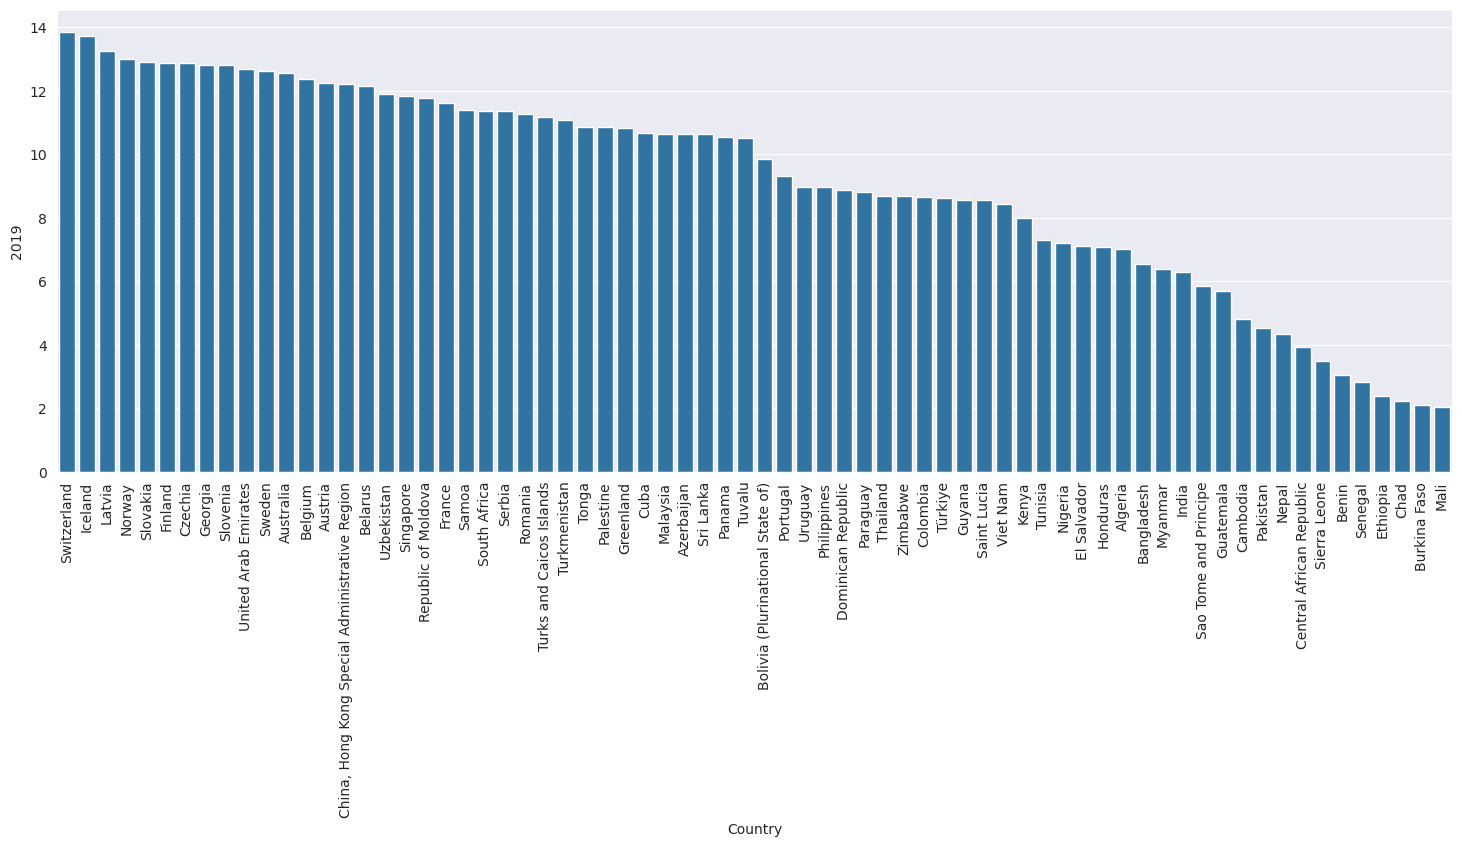

In [96]:
#Plotar barplot com a escolaridade média dos países

ano=2019

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.barplot(data=mean_year_schooling.sort_values(by=ano,ascending=False).dropna(subset=ano),x="Country",y=ano)



In [97]:
#Criar um dataframe onde em cada coluna os paises estão ordenados pela escolaridade média

anos=np.arange(2017,2024)
df_paises_mean_year_schooling={}

for ano in anos:
    df_paises_mean_year_schooling[str(ano)]=mean_year_schooling.sort_values(by=ano,ascending=False).reset_index(drop=True).loc[:,"Country"] 
    num_not_na=sum(~mean_year_schooling[ano].isna())
    df_paises_mean_year_schooling[str(ano)].iloc[num_not_na:]=np.nan

df_paises_mean_year_schooling=pd.DataFrame.from_dict(df_paises_mean_year_schooling)
df_paises_mean_year_schooling.index=np.arange(1,len(df_paises_mean_year_schooling)+1)
df_paises_mean_year_schooling.index.rename("Rank",inplace=True)
df_paises_mean_year_schooling

,2017,2018,2019,2020,2021,2022,2023
Rank,,,,,,,
1,Estonia,Germany,Switzerland,Germany,Canada,United States of America,Azerbaijan
2,United States of America,Switzerland,Iceland,Iceland,United States of America,United Arab Emirates,NaN
3,Lithuania,Estonia,Latvia,United States of America,United Kingdom,Australia,NaN
4,United Kingdom,United States of America,Norway,Estonia,Australia,Georgia,NaN
5,Norway,Georgia,Slovakia,Lithuania,United Arab Emirates,"China, Hong Kong Special Administrative Region",NaN
...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
#n paises com as maiores escolariddes médias para um ano selecionado

ano=2020
n=20    #número de países
mean_year_schooling_ano_selecionado=mean_year_schooling.loc[:,["Country",ano]].sort_values(by=ano,ascending=False).head(n)
mean_year_schooling_ano_selecionado.index=np.arange(1,n+1)
mean_year_schooling_ano_selecionado

,Country,2020
1,Germany,14.25594
2,Iceland,13.76717
3,United States of America,13.68343
4,Estonia,13.54843
5,Lithuania,13.49810
6,United Kingdom,13.40612
7,Poland,13.16475
8,Denmark,12.96049
9,New Zealand,12.94469
10,Japan,12.66923


In [159]:
#Salvar para adicionar no readme

#Salvar dataframe para incluir no readme
mean_year_schooling_ano_selecionado=mean_year_schooling_ano_selecionado.iloc[:10,:]
#Estilo da legenda
styles = [dict(selector="caption",
                       props=[("text-align", "left"),
                              ("font-size", "90%"),
                             ("color", 'black')])]
#texto da legenda
legenda= 'Tabela 8 - Paises com as maiores escolaridades médias no ano de 2020'

#A função e necessária para aplicação de duas transformações no dataframe
#As transformações são a remoção do index e a adição da legenda
def make_pretty(styler):
    styler.set_caption(legenda).set_table_styles(styles)
    styler.format().hide(axis='index')
    styler.format(precision=2)
    return styler

mean_year_schooling_ano_selecionado=mean_year_schooling_ano_selecionado.style.pipe(make_pretty)

dfi.export(mean_year_schooling_ano_selecionado,path_salvar+'mean_year_schooling_ano_selecionado.png')


In [99]:
#Paises com as maiores escolaridade médias

#Países coloridos de acordo com a escolaridade média dos seus habitantes
#Os dados da escolaridade média estão na colunas com os anos. Por exemplo, na coluna 2018 estão os dados de escolaridade média para o ano de 2018

ano=2018
fig = px.choropleth(mean_year_schooling, locations='Codigo Paises', color=ano,hover_name='Country',
            projection='natural earth')
title='Escolaridade Média por País em {}'.format(ano) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.85) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()

In [100]:
#Criação de um dataframe que agrupa os dados do número de universidades por pais no top 100 dos três rankings e os dados de escolaridade média
#Os dados do número de universidades no top 100 dizem respeito ao último ranking publicado por cada uma das instituições

anos_mean_year_schooling=[ano for ano in range(2017,2024)]
anos_mean_year_schooling+=['Codigo Paises']

location_top_100_mean_year_schooling=location_top_100_codigos_paises.join(mean_year_schooling.loc[:,anos_mean_year_schooling].set_index('Codigo Paises'),on='Codigo Paises',how='inner')
location_top_100_mean_year_schooling.drop(columns='Codigo Paises',inplace=True)
location_top_100_mean_year_schooling

,Ranking THE,Ranking QS,Ranking Shanghai,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,
United States,36,25,38,13.41329,13.50162,NaN,13.68343,13.57550,13.91420,NaN
United Kingdom,11,15,8,13.16133,NaN,NaN,13.40612,13.49290,NaN,NaN
Germany,8,5,4,NaN,14.07738,NaN,14.25594,NaN,NaN,NaN
China,7,5,10,NaN,7.81652,NaN,7.95142,NaN,NaN,NaN
Australia,6,9,6,12.32017,12.45901,12.56471,12.64336,12.78440,12.86539,NaN
Netherlands,6,2,3,NaN,12.32301,NaN,12.58163,NaN,NaN,NaN
Hong Kong,5,5,1,12.16905,NaN,12.22621,NaN,NaN,12.34777,NaN
France,4,4,4,11.40970,NaN,11.61006,NaN,NaN,NaN,NaN
Switzerland,3,2,5,NaN,13.79969,13.85966,NaN,NaN,NaN,NaN


In [101]:
# Comparativo da escolaridade média de habitantes de países cujas universidades entraram 
# no top 100 com a dos paises sem universidades no top 100

mean_year_schooling_top_100=mean_year_schooling.join(location_top_100_codigos_paises.set_index("Codigo Paises"),on="Codigo Paises",how='left')
mean_year_schooling_no_top100=mean_year_schooling_top_100.loc[~mean_year_schooling_top_100['Ranking THE'].isna()] # paises com universidades no top 100. Valores para a coluna de qualquer um dos rankings não sao nan
mean_year_schooling_fora_top100=mean_year_schooling_top_100.loc[mean_year_schooling_top_100['Ranking THE'].isna()] #paises sem universidades no top 100. Para esses paises os valores nas colunas com os rankings são nan

In [102]:
#Estatísticas de escolaridade média para paises com universidades no top 100

mean_year_schooling_no_top100.describe().iloc[:,:7]

,2017,2018,2019,2020,2021,2022,2023
count,13.000000,11.000000,9.000000,12.000000,6.000000,5.000000,0.0
mean,11.562218,11.509149,12.304989,12.115527,13.076647,12.492320,NaN
std,1.654680,2.283277,0.902896,1.849007,0.653709,1.024916,NaN
min,7.851760,7.816520,10.645060,7.951420,12.327750,11.093500,NaN
25%,11.409700,10.018945,11.850170,11.729680,12.504748,12.240740,NaN
50%,12.169050,12.323010,12.375680,12.656295,13.138650,12.347770,NaN
75%,12.486050,13.181165,12.609720,13.071898,13.554850,12.865390,NaN
max,13.413290,14.077380,13.859660,14.255940,13.867800,13.914200,NaN


In [103]:
#Estatísticas de escolaridade média para paises que nao tem universidades no top 100

mean_year_schooling_fora_top100.describe().iloc[:,:7]

,2017,2018,2019,2020,2021,2022,2023
count,50.000000,56.000000,61.000000,44.000000,17.000000,23.000000,1.00000
mean,8.838964,8.520193,8.694869,9.736683,7.731957,9.461163,11.06978
std,3.223457,3.234870,3.290252,2.719962,3.739024,3.104034,NaN
min,2.650250,1.245910,2.041840,1.626710,2.266550,1.900300,11.06978
25%,6.398915,6.411252,6.549980,8.813855,4.503730,8.797230,11.06978
50%,9.430835,8.814950,8.865480,10.491500,7.585970,10.773130,11.06978
75%,11.181292,10.861405,11.275120,11.409693,11.458830,11.581280,11.06978
max,13.555480,13.656310,13.727360,13.767170,12.773750,12.989950,11.06978


## Número de alunos matriculados por nivel educacional 


Número total de alunos matriculados em quatro niveis educacionais, são eles:

- Primario;         
- Secundario;       
- Tecnico;          
- Universitario.    

In [104]:
numero_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Afghanistan,6350404.0,6544906.0,6777785.0,NaN,NaN,NaN,NaN,Primario,AFG
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA
2,Albania,174836.0,170861.0,167104.0,162170.0,158528.0,154140.0,NaN,Primario,ALB
3,Algeria,4283207.0,4429994.0,4580288.0,4852322.0,4852322.0,5050667.0,5187616.0,Primario,DZA
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM


In [105]:
numero_matriculados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 278
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1116 non-null   object 
 1   2017             689 non-null    float64
 2   2018             689 non-null    float64
 3   2019             685 non-null    float64
 4   2020             667 non-null    float64
 5   2021             646 non-null    float64
 6   2022             485 non-null    float64
 7   2023             52 non-null     float64
 8   Nivel de Ensino  1116 non-null   object 
 9   Codigo Paises    952 non-null    object 
dtypes: float64(7), object(3)
memory usage: 95.9+ KB


In [106]:
numero_matriculados.describe()

,2017,2018,2019,2020,2021,2022,2023
count,6.890000e+02,6.890000e+02,6.850000e+02,6.670000e+02,6.460000e+02,4.850000e+02,5.200000e+01
mean,1.739432e+07,1.742331e+07,1.767479e+07,1.849264e+07,1.936926e+07,2.506869e+07,7.220189e+06
std,6.772712e+07,6.746815e+07,6.847430e+07,7.049779e+07,7.256674e+07,8.453243e+07,2.601973e+07
min,2.200000e+01,1.400000e+01,9.000000e+00,1.400000e+01,6.000000e+00,1.000000e+01,1.200000e+01
25%,8.561700e+04,8.160200e+04,6.589000e+04,6.860750e+04,8.049900e+04,7.807900e+04,7.946850e+04
50%,5.759800e+05,5.388710e+05,5.210870e+05,5.644210e+05,6.095280e+05,8.004560e+05,5.804820e+05
75%,3.850080e+06,3.616114e+06,3.421868e+06,3.794719e+06,3.964854e+06,4.944290e+06,3.147792e+06
max,7.429111e+08,7.325039e+08,7.418790e+08,7.511685e+08,7.558867e+08,7.708298e+08,1.343421e+08


In [107]:
numero_matriculados['Nivel de Ensino'].value_counts()

Nivel de Ensino
Primario         279
Secundario       279
Tecnico          279
Universitario    279
Name: count, dtype: int64

In [108]:
#Paises com maior número de estudantes matriculados no ensino primário

#Nos dados estão o número de paises em agrupamentos de países (OCDE por exemplo), regiões e continentes
#numero_matriculados['Codigo Paises'].notna() -> esta condição foi usada para selecionar somente países, e não agrupamentos e regiões

numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Primario') ,:].sort_values(by=2021,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
99,India,123807892.0,122378527.0,120044806.0,121700126.0,122027751.0,131348083.2,131298001.0,Primario,IND
43,China,100321027.0,101872977.0,104325244.0,106250528.0,107730038.0,108019743.0,NaN,Primario,CHN
153,Nigeria,24543722.0,27889387.0,28078437.0,30100084.0,30455582.0,NaN,NaN,Primario,NGA
100,Indonesia,29351817.0,29425748.0,29120793.0,29329969.0,29241826.0,28829725.0,NaN,Primario,IDN
160,Pakistan,21686451.0,22931305.0,23587997.0,NaN,24276648.0,NaN,NaN,Primario,PAK
...,...,...,...,...,...,...,...,...,...,...
233,Venezuela (Bolivarian Republic of),3285299.0,3312560.0,NaN,NaN,NaN,NaN,NaN,Primario,VEN
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,YEM


In [109]:
#Paises com maior número de estudantes matriculados no ensino secundario
#numero_matriculados['Codigo Paises'].notna() -> esta condição foi usada para selecionar somente países, e não agrupamentos e regiões

ano_ordenar=2021 #coluna que será usada para ordenar os dados
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Secundario') ,:].sort_values(by=ano_ordenar,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
99,India,1.298292e+08,1.317598e+08,1.309328e+08,1.339623e+08,1.385115e+08,1.390980e+08,1.343421e+08,Secundario,IND
43,China,8.340792e+07,8.432186e+07,8.610170e+07,8.840992e+07,9.091919e+07,9.374084e+07,NaN,Secundario,CHN
100,Indonesia,2.431826e+07,2.489357e+07,2.543831e+07,2.623089e+07,2.680637e+07,2.708420e+07,NaN,Secundario,IDN
228,United States of America,2.478796e+07,2.487136e+07,2.501423e+07,2.518346e+07,2.543293e+07,2.519971e+07,NaN,Secundario,USA
28,Brazil,2.311818e+07,2.286391e+07,2.224834e+07,2.216234e+07,2.231155e+07,NaN,NaN,Secundario,BRA
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ZMB


In [110]:
#Paises com maior número de estudantes matriculados no ensino Tecnico
#numero_matriculados['Codigo Paises'].notna() -> esta condição foi usada para selecionar somente países, e não agrupamentos e regiões

ano_ordenar=2021 #coluna que será usada para ordenar os dados
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Tecnico') ,:].sort_values(by=ano_ordenar,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
228,United States of America,1.209539e+06,1.196510e+06,1.182524e+06,1.249890e+06,1.196384e+06,1.176491e+06,NaN,Tecnico,USA
99,India,NaN,NaN,NaN,2.521750e+06,1.045189e+06,1.134221e+06,1522607.191,Tecnico,IND
43,China,NaN,NaN,9.964030e+05,8.792060e+05,9.677420e+05,NaN,NaN,Tecnico,CHN
28,Brazil,8.743710e+05,8.948620e+05,9.628250e+05,9.365470e+05,8.360400e+05,NaN,NaN,Tecnico,BRA
81,Germany,7.657964e+05,7.706346e+05,7.420942e+05,7.435201e+05,7.219737e+05,NaN,NaN,Tecnico,DEU
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tecnico,ZMB


In [111]:
#Paises com maior número de estudantes matriculados no ensino Universitario
#numero_matriculados['Codigo Paises'].notna() -> esta condição foi usada para selecionar somente países, e não agrupamentos e regiões

ano_ordenar=2021 #coluna que será usada para ordenar os dados
numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Universitario') ,:].sort_values(by=ano_ordenar,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
43,China,4.412751e+07,4.493517e+07,4.699361e+07,5.023746e+07,5.382303e+07,5.713828e+07,NaN,Universitario,CHN
99,India,3.337411e+07,3.433759e+07,3.514812e+07,3.639289e+07,3.887006e+07,4.054963e+07,41377424.0,Universitario,IND
228,United States of America,1.901453e+07,1.894197e+07,1.882591e+07,1.875701e+07,1.815943e+07,1.786012e+07,NaN,Universitario,USA
28,Brazil,8.571423e+06,8.741996e+06,8.897906e+06,8.986592e+06,9.312309e+06,9.769427e+06,NaN,Universitario,BRA
100,Indonesia,7.944099e+06,8.037218e+06,8.310582e+06,8.481838e+06,8.992031e+06,9.320129e+06,NaN,Universitario,IDN
...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,YEM
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ZMB


## Proporção de pessoas matriculadas por nivel educacional

Proporção de pessoas matriculadas nos ensinos primário e secundário.
A proporção é calculada levando em conta o total de pessoas na faixa etária correspondente ao nível educacional

In [112]:
proporcao_matriculados.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,AFG
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,NaN,Primario,ALB
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario,DZA
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM


In [113]:
#Renomear colunas
#Adição de '%' no nome das colunas para indicar que os dados são um porcentagem

dicionario_renomear={}
for ano in np.arange(2017,2024):
    dicionario_renomear[ano]=str(ano)+' (%)' 

proporcao_matriculados=proporcao_matriculados.rename(columns=dicionario_renomear)
proporcao_matriculados

,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%),Nivel de Ensino,Codigo Paises
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,AFG
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,NaN,Primario,ALB
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario,DZA
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM
...,...,...,...,...,...,...,...,...,...,...
274,Low income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,None
275,Lower middle income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,None
276,Middle income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,None
277,Upper middle income countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,None


In [114]:
proporcao_matriculados['Nivel de Ensino'].value_counts()

Nivel de Ensino
Primario      279
Secundario    279
Name: count, dtype: int64

In [115]:
#Paises com as maiores proporções de alunos matriculados no ensino primário (dentre pessoas na faixa de idade correspondente ao ensino primario)

coluna_ordenar='2021 (%)' #coluna que será usada para ordenar os dados
proporcao_matriculados.loc[(proporcao_matriculados['Codigo Paises'].notna())&(proporcao_matriculados['Nivel de Ensino']=='Primario') ,:].sort_values(by=coluna_ordenar,ascending=False)

,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%),Nivel de Ensino,Codigo Paises
226,United Kingdom of Great Britain and Northern I...,97.79255,97.63362,97.52734,96.97491,99.97845,96.90938,NaN,Primario,GRB
108,Japan,99.94980,99.90750,99.91429,99.86585,99.96979,NaN,NaN,Primario,JPN
55,Cyprus,98.65960,99.42478,99.49263,99.58940,99.93439,NaN,NaN,Primario,CYP
170,Portugal,98.19459,98.54654,99.27726,99.78522,99.92759,NaN,NaN,Primario,PRT
166,Peru,95.88938,96.21042,98.30315,99.74892,99.91618,99.74132,NaN,Primario,PER
...,...,...,...,...,...,...,...,...,...,...
233,Venezuela (Bolivarian Republic of),87.54041,NaN,NaN,NaN,NaN,NaN,NaN,Primario,VEN
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,YEM


In [116]:
#Paises com as maiores proporções de alunos matriculados no ensino secundário (dentre pessoas na faixa de idade correspondente ao ensino secundário)

coluna_ordenar='2021 (%)' #coluna que será usada para ordenar os dados
proporcao_matriculados.loc[(proporcao_matriculados['Codigo Paises'].notna())&(proporcao_matriculados['Nivel de Ensino']=='Secundario') ,:].sort_values(by=coluna_ordenar,ascending=False)

,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%),Nivel de Ensino,Codigo Paises
170,Portugal,98.67522,99.33155,99.90730,99.65732,99.83490,NaN,NaN,Secundario,PRT
80,Georgia,96.77942,98.43721,98.08956,98.31608,99.64508,99.37321,99.417,Secundario,GEO
103,Ireland,99.36727,98.63785,98.22815,98.52392,99.16323,NaN,NaN,Secundario,IRL
20,Belgium,99.01620,99.04458,98.71545,98.97974,98.98732,NaN,NaN,Secundario,BEL
228,United States of America,95.21186,96.40283,96.24925,97.02672,98.82068,94.93369,NaN,Secundario,USA
...,...,...,...,...,...,...,...,...,...,...
233,Venezuela (Bolivarian Republic of),72.45521,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,VEN
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,WLF
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ESH
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,YEM


### Comparativo entre número total de matriculados e a proporção de matriculados


In [117]:
#Criação de dataframes especificos para cada nivel de ensino
#Numero de matriculados nos ensinos primário e secundário

numero_matriculados_primario    =numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Primario') ,:]
numero_matriculados_secundario=numero_matriculados.loc[(numero_matriculados['Codigo Paises'].notna())&(numero_matriculados['Nivel de Ensino']=='Secundario') ,:]

In [118]:
#Criação de dataframes especificos para cada nivel de ensino
#Proporcao de matriculados nos ensinos primário e secundario

proporcao_matriculados_primario      =proporcao_matriculados.loc[(proporcao_matriculados['Codigo Paises'].notna())&(proporcao_matriculados['Nivel de Ensino']=='Primario') ,:]
proporcao_matriculados_secundario    =proporcao_matriculados.loc[(proporcao_matriculados['Codigo Paises'].notna())&(proporcao_matriculados['Nivel de Ensino']=='Secundario') ,:]


In [119]:
#Criação de dataframes com join entre numero total de matriculados e a proporção de matriculados

total_propocao_matriculados_primario=numero_matriculados_primario.join(proporcao_matriculados_primario.set_index('Codigo Paises'),on='Codigo Paises',how='inner',lsuffix=" Total")
total_propocao_matriculados_secundario=numero_matriculados_secundario.join(proporcao_matriculados_secundario.set_index('Codigo Paises'),on='Codigo Paises',how='inner',lsuffix=" Total")

In [120]:
total_propocao_matriculados_primario

,Country Total,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino Total,Codigo Paises,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%),Nivel de Ensino
0,Afghanistan,6350404.0,6544906.0,6777785.0,NaN,NaN,NaN,NaN,Primario,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ALA,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
2,Albania,174836.0,170861.0,167104.0,162170.0,158528.0,154140.0,NaN,Primario,ALB,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,NaN,Primario
3,Algeria,4283207.0,4429994.0,4580288.0,4852322.0,4852322.0,5050667.0,5187616.0,Primario,DZA,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429,Primario
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ASM,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,WLF,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,ESH,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario,YEM,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primario
238,Zambia,3284841.0,3339245.0,3382087.0,3415770.0,NaN,NaN,NaN,Primario,ZMB,Zambia,85.55495,NaN,NaN,NaN,NaN,NaN,NaN,Primario


In [121]:
#Remover colunas desnecessárias e renomear colunas

if all([i in total_propocao_matriculados_primario.columns.to_list() for i in ['Country Total','Nivel de Ensino Total','Nivel de Ensino']]):    
    total_propocao_matriculados_primario=total_propocao_matriculados_primario.drop(columns=['Country Total','Nivel de Ensino Total','Nivel de Ensino'])
    total_propocao_matriculados_secundario=total_propocao_matriculados_secundario.drop(columns=['Country Total','Nivel de Ensino Total','Nivel de Ensino'])

for ano in range(2017,2025):
    total_propocao_matriculados_primario=total_propocao_matriculados_primario.rename(columns={ano:str(ano)+" Total"})
    total_propocao_matriculados_secundario=total_propocao_matriculados_secundario.rename(columns={ano:str(ano)+" Total"})


In [122]:
#Reordenando as colunas para que os valores com o tatal de estudandes apareça ao lado da propocao de estudantes em cada ano

colunas=["Country"]
for ano in range(2017,2024):
    colunas+=[str(ano)+' Total',str(ano)+' (%)']
colunas

total_propocao_matriculados_primario=total_propocao_matriculados_primario[colunas]
total_propocao_matriculados_primario=total_propocao_matriculados_primario.sort_values(by='2021 Total',ascending=False)

total_propocao_matriculados_secundario=total_propocao_matriculados_secundario[colunas]
total_propocao_matriculados_secundario=total_propocao_matriculados_secundario.sort_values(by='2021 Total',ascending=False)

In [123]:
#Transformar a coluna com os nomes dos países no index do dataframwe

total_propocao_matriculados_primario.set_index('Country',inplace=True)
total_propocao_matriculados_secundario.set_index('Country',inplace=True)

In [124]:
#Visualizar dataframe formatado
#Ensino Primário

num_rows_to_display=20 #número de colunas que serão printadas na tela
total_propocao_matriculados_primario.head(num_rows_to_display).style.format(thousands=',',precision=2)

,2017 Total,2017 (%),2018 Total,2018 (%),2019 Total,2019 (%),2020 Total,2020 (%),2021 Total,2021 (%),2022 Total,2022 (%),2023 Total,2023 (%)
Country,,,,,,,,,,,,,,
India,"123,807,892.00",93.97,"122,378,527.00",93.62,"120,044,806.00",92.63,"121,700,126.00",95.94,"122,027,751.00",97.69,"131,348,083.20",99.85,"131,298,001.00",98.53
China,"100,321,027.00",nan,"101,872,977.00",nan,"104,325,244.00",nan,"106,250,528.00",nan,"107,730,038.00",nan,"108,019,743.00",nan,nan,nan
Nigeria,"24,543,722.00",nan,"27,889,387.00",nan,"28,078,437.00",nan,"30,100,084.00",nan,"30,455,582.00",nan,nan,nan,nan,nan
Indonesia,"29,351,817.00",94.73,"29,425,748.00",93.00,"29,120,793.00",98.30,"29,329,969.00",97.34,"29,241,826.00",98.58,"28,829,725.00",98.79,nan,nan
Pakistan,"21,686,451.00",nan,"22,931,305.00",nan,"23,587,997.00",nan,nan,nan,"24,276,648.00",73.29,nan,nan,nan,nan
United States of America,"25,123,677.23",99.58,"24,957,955.89",99.43,"24,786,459.73",99.08,"24,465,917.99",97.99,"23,913,326.46",95.90,"23,519,713.53",96.02,nan,nan
Democratic Republic of the Congo,nan,nan,"16,807,014.00",nan,nan,nan,"18,789,020.00",nan,"20,169,275.00",nan,nan,nan,nan,nan
Ethiopia,"16,844,906.00",nan,"16,997,650.00",nan,"16,358,329.00",nan,"20,419,152.00",nan,"18,447,497.00",75.25,"15,521,017.00",76.16,nan,nan
Bangladesh,"17,195,385.00",97.42,"17,338,100.00",99.53,nan,nan,"17,603,839.00",nan,"16,964,967.00",nan,"17,162,365.00",nan,nan,nan


In [125]:
#Visualizar dataframe formatado
#Ensino Secundário

total_propocao_matriculados_secundario.head(num_rows_to_display).style.format(thousands=',',precision=2)

,2017 Total,2017 (%),2018 Total,2018 (%),2019 Total,2019 (%),2020 Total,2020 (%),2021 Total,2021 (%),2022 Total,2022 (%),2023 Total,2023 (%)
Country,,,,,,,,,,,,,,
India,"129,829,194.00",nan,"131,759,759.00",nan,"130,932,819.00",nan,"133,962,311.36",58.48,"138,511,516.05",60.74,"139,098,028.32",58.03,"134,342,140.81",56.99
China,"83,407,925.00",nan,"84,321,859.00",nan,"86,101,697.00",nan,"88,409,924.00",nan,"90,919,187.00",nan,"93,740,841.00",nan,nan,nan
Indonesia,"24,318,262.00",79.87,"24,893,570.00",81.88,"25,438,313.00",80.47,"26,230,892.00",88.64,"26,806,366.00",83.55,"27,084,200.00",81.85,nan,nan
United States of America,"24,787,964.41",95.21,"24,871,356.56",96.40,"25,014,234.18",96.25,"25,183,457.20",97.03,"25,432,931.18",98.82,"25,199,709.56",94.93,nan,nan
Brazil,"23,118,179.00",84.21,"22,863,908.00",85.68,"22,248,336.00",85.99,"22,162,341.00",86.65,"22,311,548.00",88.50,nan,nan,nan,nan
Bangladesh,"15,314,757.00",49.85,"15,869,820.00",56.59,"15,710,974.00",nan,"15,954,852.00",58.12,"16,022,928.00",58.45,"16,070,344.00",79.01,nan,nan
Pakistan,"12,529,168.00",nan,"13,357,618.00",nan,"14,189,390.00",nan,nan,nan,"15,421,192.00",50.68,nan,nan,nan,nan
Nigeria,nan,nan,"11,374,084.00",nan,nan,nan,"13,154,092.00",nan,"13,947,585.00",nan,nan,nan,nan,nan
Mexico,"14,034,552.00",74.14,"14,160,635.00",74.52,"14,105,856.00",74.25,"13,709,381.00",72.58,"13,128,205.00",70.30,"13,112,615.00",68.94,nan,nan


### Proporções de matriculados por nivel educacional em paises com e sem universidades no top 100

In [126]:
location_top_100_codigos_paises

,Ranking THE,Ranking QS,Ranking Shanghai,Codigo Paises
Country,,,,
United States,36,25,38,USA
United Kingdom,11,15,8,GBR
Germany,8,5,4,DEU
China,7,5,10,CHN
Australia,6,9,6,AUS
Netherlands,6,2,3,NLD
Hong Kong,5,5,1,HKG
France,4,4,4,FRA
Switzerland,3,2,5,CHE


In [127]:
#Criação de dois dafaframes:
    #1) paises de origem das universidades no top 100 e as propoções de alunos matriculados no ensino primário desses países;
    #2) paises de origem das universidades no top 100 e as propoções de alunos matriculados no ensino secundario desses países;

colunas=[str(ano)+' (%)' for ano in np.arange(2017,2024)] + ['Codigo Paises']
location_top_100_prop_matri_primario  =location_top_100_codigos_paises.join(proporcao_matriculados_primario.loc[:,colunas].set_index("Codigo Paises"),on='Codigo Paises')
location_top_100_prop_matri_secundario=location_top_100_codigos_paises.join(proporcao_matriculados_secundario.loc[:,colunas].set_index("Codigo Paises"),on='Codigo Paises')

In [128]:
#Ensino Primário
#Proporção de matriculados no ensino primário em países com universiddes no top 100

location_top_100_prop_matri_primario.style.format(thousands=',',precision=2)

,Ranking THE,Ranking QS,Ranking Shanghai,Codigo Paises,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
Country,,,,,,,,,,,
United States,36,25,38,USA,99.58,99.43,99.08,97.99,95.90,96.02,nan
United Kingdom,11,15,8,GBR,nan,nan,nan,nan,nan,nan,nan
Germany,8,5,4,DEU,98.92,99.13,99.04,98.81,98.54,nan,nan
China,7,5,10,CHN,nan,nan,nan,nan,nan,nan,nan
Australia,6,9,6,AUS,99.94,99.81,99.79,99.42,99.63,99.70,nan
Netherlands,6,2,3,NLD,99.80,99.74,99.87,99.83,99.81,nan,nan
Hong Kong,5,5,1,HKG,99.78,99.88,99.93,99.34,98.97,99.12,nan
France,4,4,4,FRA,99.94,99.99,99.88,99.96,99.90,99.97,nan
Switzerland,3,2,5,CHE,99.87,99.87,99.89,99.86,99.76,99.74,nan


In [129]:
#Ensino Secundário
#Proporção de matriculados no ensino secundário em países com universidades no top 100

location_top_100_prop_matri_secundario.style.format(thousands=',',precision=2)

,Ranking THE,Ranking QS,Ranking Shanghai,Codigo Paises,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
Country,,,,,,,,,,,
United States,36,25,38,USA,95.21,96.40,96.25,97.03,98.82,94.93,nan
United Kingdom,11,15,8,GBR,nan,nan,nan,nan,nan,nan,nan
Germany,8,5,4,DEU,89.81,88.77,89.36,89.00,89.44,nan,nan
China,7,5,10,CHN,nan,nan,nan,nan,nan,nan,nan
Australia,6,9,6,AUS,98.83,94.08,96.77,96.41,95.50,93.87,nan
Netherlands,6,2,3,NLD,94.93,94.53,94.45,94.23,94.96,nan,nan
Hong Kong,5,5,1,HKG,99.89,99.59,98.67,94.57,97.48,94.03,nan
France,4,4,4,FRA,95.21,95.25,95.61,96.69,96.30,96.02,nan
Switzerland,3,2,5,CHE,91.17,91.18,91.08,91.53,91.93,91.75,nan


In [129]:
#Criar  dataframes com a proporção de matriculados somente em paises que não tem universidades no top 100 dos rankings

colunas_mantidas=['Country']+[str(ano)+' (%)' for ano in range(2017,2024)]
proporcao_matriculados_primario_fora_do_top_100=proporcao_matriculados_primario.join(location_top_100_codigos_paises.set_index('Codigo Paises') ,on='Codigo Paises',how='left')
condicao=proporcao_matriculados_primario_fora_do_top_100['Ranking THE'].isnull()  #nan para paises que nao tem universidades no top 100
proporcao_matriculados_primario_fora_do_top_100=proporcao_matriculados_primario_fora_do_top_100.loc[condicao,colunas_mantidas]

proporcao_matriculados_secundario_fora_do_top_100=proporcao_matriculados_secundario.join(location_top_100_codigos_paises.set_index('Codigo Paises') ,on='Codigo Paises',how='left')
proporcao_matriculados_secundario_fora_do_top_100=proporcao_matriculados_secundario_fora_do_top_100.loc[condicao,colunas_mantidas]


In [130]:
#Ensino primário
#Proporção de matriculados no ensino primário em países que não tem universidades no top 100

proporcao_matriculados_primario_fora_do_top_100

,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,98.29327,98.35528,97.89225,96.60134,93.81288,90.79598,NaN
3,Algeria,99.76018,99.87218,99.87623,99.69847,99.80355,99.37132,99.02429
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,Zambia,85.55495,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#Ensino secundário
#Proporção de matriculados no ensino secundário em países que não tem universidades no top 100

proporcao_matriculados_secundario_fora_do_top_100

,Country,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
0,Afghanistan,43.84428,45.45444,NaN,NaN,NaN,NaN,NaN
1,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,88.98340,86.98836,86.7062,83.83488,86.76399,85.45628,NaN
3,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,83.38552
4,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
235,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Estatíticas da proporção de matriculados no ensino primário para paises que nao tem universidades no top 100 dos rankings

proporcao_matriculados_primario_fora_do_top_100.describe()

,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
count,130.000000,123.000000,124.000000,124.000000,120.000000,89.000000,14.000000
mean,92.894712,92.990286,93.094830,93.495957,92.153838,92.279632,90.064483
std,9.411824,9.623961,8.733480,7.491779,8.777178,8.787760,12.648248
min,47.393650,49.676360,54.756660,56.178680,57.242200,58.447880,60.414000
25%,91.322555,92.718930,91.590745,90.708875,89.123168,90.422100,81.429750
50%,96.049320,96.575000,96.340275,96.175670,95.554490,94.782000,96.221000
75%,98.634215,98.706460,98.328315,98.518785,98.419010,98.322000,98.322250
max,99.980670,99.994000,99.947120,99.986920,99.978450,99.936770,99.262000


In [134]:
# Estatíticas da proporção de matriculados no ensino primário para os paises com universidades no top 100

location_top_100_prop_matri_primario.describe().iloc[:,3:]

,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
count,24.000000,24.000000,24.000000,24.000000,24.000000,12.000000,0.0
mean,99.006439,99.020860,98.959645,98.792873,98.528813,98.678401,NaN
std,1.229880,1.217829,1.289130,1.266425,1.508425,1.504200,NaN
min,95.776650,95.171800,95.760000,95.479280,94.770440,95.307000,NaN
25%,98.709113,98.700963,98.931720,98.460550,98.352802,98.567338,NaN
50%,99.506925,99.479165,99.311105,99.243310,99.134090,99.268565,NaN
75%,99.886670,99.823565,99.876005,99.738310,99.631613,99.669457,NaN
max,99.971340,99.998260,99.981980,99.959440,99.969790,99.967510,NaN


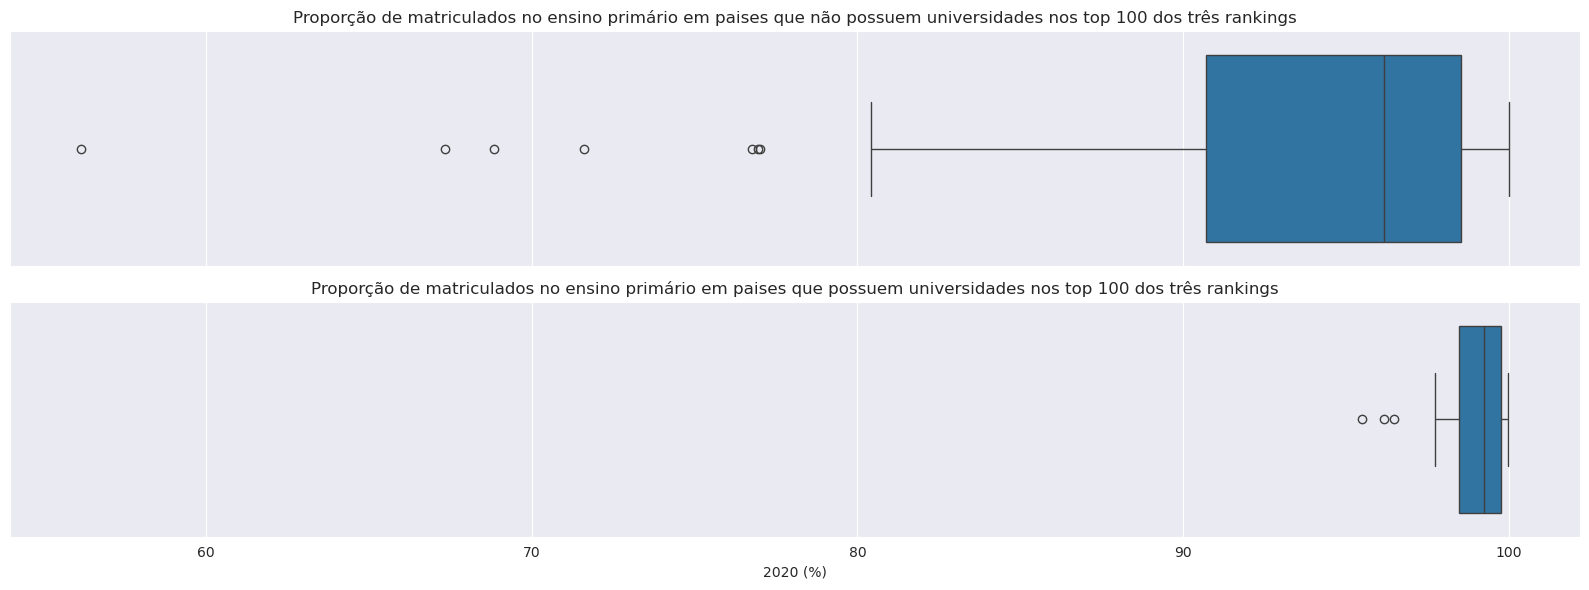

In [134]:
#Plotar boxplot comparando os dados de paises cujas universidades entraram no 100 de algum dos trÊs rankings com os dados dos demais paises

ano_selecionado=2020 #serão plotados os dados do ano selecionado
fig,axs=plt.subplots(ncols=1,nrows=2,sharex=True,figsize=(16,6))

sns.boxplot(data=proporcao_matriculados_primario_fora_do_top_100,x=str(ano_selecionado)+' (%)',ax=axs[0])
sns.boxplot(data=location_top_100_prop_matri_primario,x=str(ano_selecionado)+' (%)',ax=axs[1])
axs[0].set_title('Proporção de matriculados no ensino primário em paises que não possuem universidades nos top 100 dos três rankings')
axs[1].set_title('Proporção de matriculados no ensino primário em paises que possuem universidades nos top 100 dos três rankings')
fig.tight_layout()


In [136]:
# Outiliers entre os países fora do top 100
#países com proporções inferiores a 80

proporcao=80 #proporção 
condicao=proporcao_matriculados_primario_fora_do_top_100[str(ano_selecionado)+' (%)']<proporcao
proporcao_matriculados_primario_fora_do_top_100.loc[condicao,['Country',str(ano_selecionado)+' (%)']]

,Country,2020 (%)
32,Burkina Faso,71.59921
60,Djibouti,56.17868
79,Gambia,76.95780
120,Liberia,68.85833
146,Nauru,77.02350
190,Senegal,76.77762
210,Syrian Arab Republic,67.32834


In [135]:
# Outiliers entre os países com universidades no top 100
#países com proporções inferiores a 97,8% aproiximadamente

proporcao=97 #proporcao
condicao=location_top_100_prop_matri_primario[str(ano_selecionado)+' (%)']<proporcao
location_top_100_prop_matri_primario.loc[condicao,[str(ano_selecionado)+' (%)']]

,2020 (%)
Country,
Brazil,95.47928
Malaysia,96.46000
Israel,96.17307


In [136]:
# Estatíticas da proporção de matriculados no ensino secundário para paises que nao tem universidades no top 100 dos rankings

proporcao_matriculados_secundario_fora_do_top_100.describe()

,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
count,112.000000,114.000000,108.000000,111.000000,114.000000,87.000000,14.000000
mean,72.278905,72.284514,74.628360,73.502836,73.396136,72.707641,66.414621
std,21.744063,21.915157,21.226174,20.460073,20.974901,21.639582,25.668110
min,13.085000,13.353000,13.487000,16.236000,12.547000,11.665000,10.013000
25%,60.534287,58.190500,64.412028,60.562155,60.999333,64.240465,55.178000
50%,79.161100,80.685995,79.995240,78.218160,78.582895,79.009000,71.587500
75%,88.912518,89.612455,90.655992,89.723830,90.291835,88.032000,82.688640
max,98.675220,99.331550,99.907300,99.657320,99.834900,99.373210,99.417000


In [137]:
# Estatíticas da proporção de matriculados no ensino secundário para os paises com universidades no top 100

location_top_100_prop_matri_secundario.describe().iloc[:,3:]

,2017 (%),2018 (%),2019 (%),2020 (%),2021 (%),2022 (%),2023 (%)
count,23.000000,23.000000,24.000000,24.000000,24.000000,12.000000,0.0
mean,92.163414,91.723424,92.193067,90.595369,91.136415,87.220237,NaN
std,8.681087,9.045737,8.386580,10.989556,11.665255,14.292260,NaN
min,62.365320,58.323200,62.696110,58.860560,58.483750,56.661680,NaN
25%,90.678610,90.970880,91.182277,90.894840,91.307012,86.043498,NaN
50%,94.570640,94.078840,94.959720,94.401400,95.482725,93.948430,NaN
75%,97.477620,95.824545,96.994323,96.774690,97.479915,95.782545,NaN
max,99.910460,99.946320,99.726630,98.979740,99.163230,97.735010,NaN


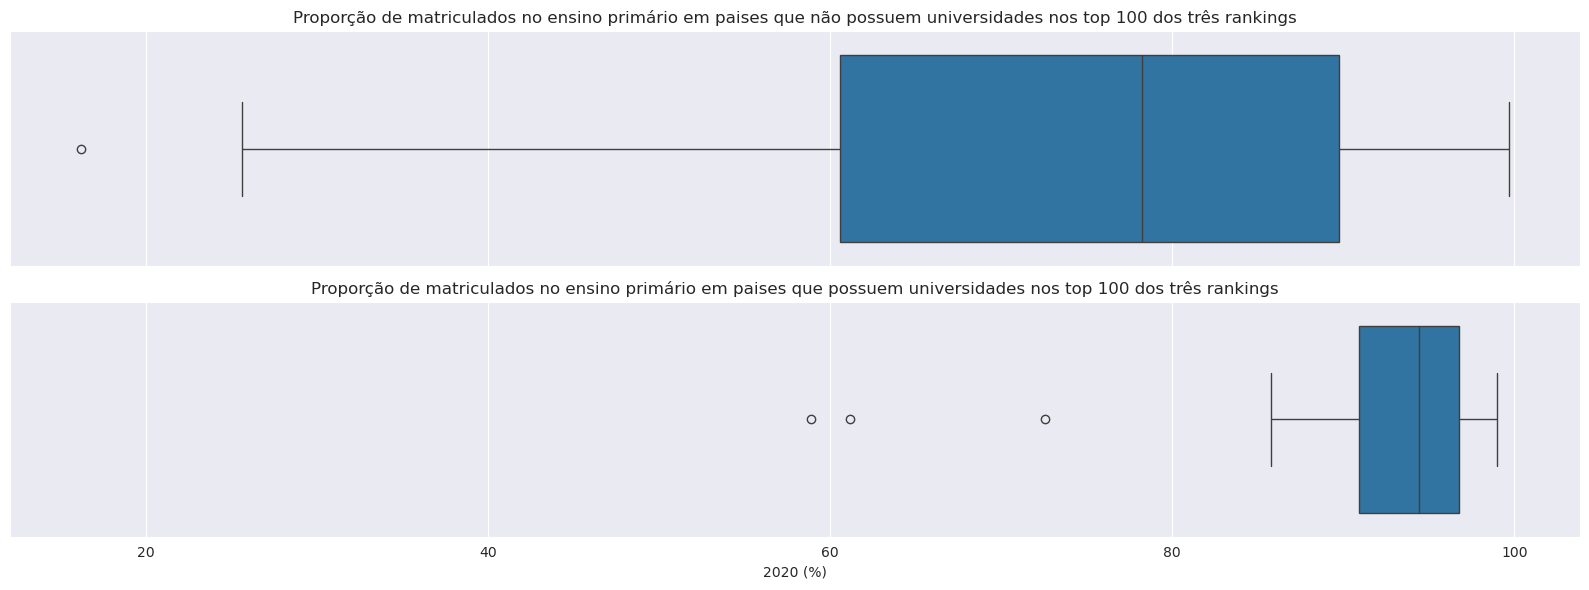

In [140]:
#Plotar boxplot comparando os dados de paises cujas universidades entraram no 100 de algum dos trÊs rankings com os dados dos demais paises

ano_selecionado=2020 #serão plotados os dados do ano selecionado
fig,axs=plt.subplots(ncols=1,nrows=2,figsize=(16,6),sharex=True)
sns.boxplot(data=proporcao_matriculados_secundario_fora_do_top_100,x=str(ano_selecionado)+' (%)',ax=axs[0])
sns.boxplot(data=location_top_100_prop_matri_secundario,x=str(ano_selecionado)+' (%)',ax=axs[1])
axs[0].set_title('Proporção de matriculados no ensino primário em paises que não possuem universidades nos top 100 dos três rankings')
axs[1].set_title('Proporção de matriculados no ensino primário em paises que possuem universidades nos top 100 dos três rankings')
fig.tight_layout()


In [141]:
# Outiliers entre os países fora do top 100
#países com proporções inferiores a 28% aproximadamente

proporcao=20
condicao=proporcao_matriculados_secundario_fora_do_top_100[str(ano_selecionado)+' (%)']<proporcao
proporcao_matriculados_secundario_fora_do_top_100.loc[condicao,['Country',str(ano_selecionado)+' (%)']]

,Country,2020 (%)
227,United Republic of Tanzania,16.236


In [142]:
# Outiliers entre os países com universidades no top 100
#países com proporções inferiores a 85% aproiximadamente

proporcao=85 
condicao=location_top_100_prop_matri_secundario[str(ano_selecionado)+' (%)']<proporcao
location_top_100_prop_matri_secundario.loc[condicao,[str(ano_selecionado)+' (%)']]

,2020 (%)
Country,
Russian Federation,61.18666
Malaysia,58.86056
Mexico,72.57681


## Investimento público direto em educação como proporção do PIB

Investimento público direto (proporção do PIB) nos seguintes níveis educacionais:

- Pre-Primario;      
- Primario;         
- Secundario;
- Tecnico;          
- Universitario.   

In [145]:
investimento_porcentagem_PIB.head()

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises
0,Republic of Moldova,1.31753,1.34942,1.47847,1.56519,1.46903,1.55889,NaN,Pre-Primario,MDA
1,Sweden,1.20930,1.21220,1.11929,1.14501,NaN,NaN,NaN,Pre-Primario,SWE
2,Belarus,1.14853,NaN,1.18270,1.19771,1.10662,NaN,NaN,Pre-Primario,BLR
3,Mongolia,1.01300,0.99600,0.97200,1.27400,0.98600,1.27400,NaN,Pre-Primario,MNG
4,Ukraine,0.94626,0.89280,0.90628,0.88962,NaN,NaN,NaN,Pre-Primario,UKR


In [146]:
investimento_porcentagem_PIB['Nivel de Ensino'].value_counts()

Nivel de Ensino
Secundario       280
Pre-Primario     279
Primario         279
Tecnico          279
Universitario    279
Name: count, dtype: int64

In [147]:
#Criação de dois dataframes, um com os dados para paises com universidades no top 100 e outro para os paises que nao tem universidades no top 100

investimento_porcentagem_PIB_join_top_100=investimento_porcentagem_PIB.join(location_top_100_codigos_paises.set_index('Codigo Paises'),on='Codigo Paises',how='left')
investimento_porcentagem_PIB_dentro_top_100=investimento_porcentagem_PIB_join_top_100.dropna(subset='Ranking THE').reset_index(drop=True,)
investimento_porcentagem_PIB_fora_top_100  =investimento_porcentagem_PIB_join_top_100[investimento_porcentagem_PIB_join_top_100['Ranking THE'].isnull()].reset_index(drop=True)

In [148]:
#Criar um nova coluna para indicar se o pais tem ou não universidades no top 100
#Essa coluna permitirá a concatenação dos dois dataframes, o que facilitará a plotagem

investimento_porcentagem_PIB_dentro_top_100['Top 100']="Sim"
investimento_porcentagem_PIB_fora_top_100['Top 100']='Não'

investimento_porcentagem_PIB_fora_dentro_top100=pd.concat([investimento_porcentagem_PIB_dentro_top_100,
                                                             investimento_porcentagem_PIB_fora_top_100],axis=0).reset_index(drop=True)





In [149]:
investimento_porcentagem_PIB_fora_dentro_top100

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises,Ranking THE,Ranking QS,Ranking Shanghai,Top 100
0,Sweden,1.20930,1.21220,1.11929,1.14501,NaN,NaN,NaN,Pre-Primario,SWE,2.0,2.0,3.0,Sim
1,Israel,0.86241,0.86800,0.84085,0.84034,NaN,NaN,NaN,Pre-Primario,ISR,0.0,0.0,3.0,Sim
2,Chile,0.74956,0.74466,0.76335,0.82359,NaN,NaN,NaN,Pre-Primario,CHL,0.0,1.0,0.0,Sim
3,Norway,0.71200,0.68456,0.71670,0.76513,NaN,NaN,NaN,Pre-Primario,NOR,0.0,0.0,1.0,Sim
4,France,0.70285,0.68735,0.67100,0.70664,NaN,NaN,NaN,Pre-Primario,FRA,4.0,4.0,4.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,AIA,NaN,NaN,NaN,Não
1392,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ASM,NaN,NaN,NaN,Não
1393,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,DZA,NaN,NaN,NaN,Não
1394,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universitario,ALA,NaN,NaN,NaN,Não


Text(0.5, 1.0, 'Investimento Público Direto em Educação em países cujam universidade entraram ou não nos top 100 dos rankings')

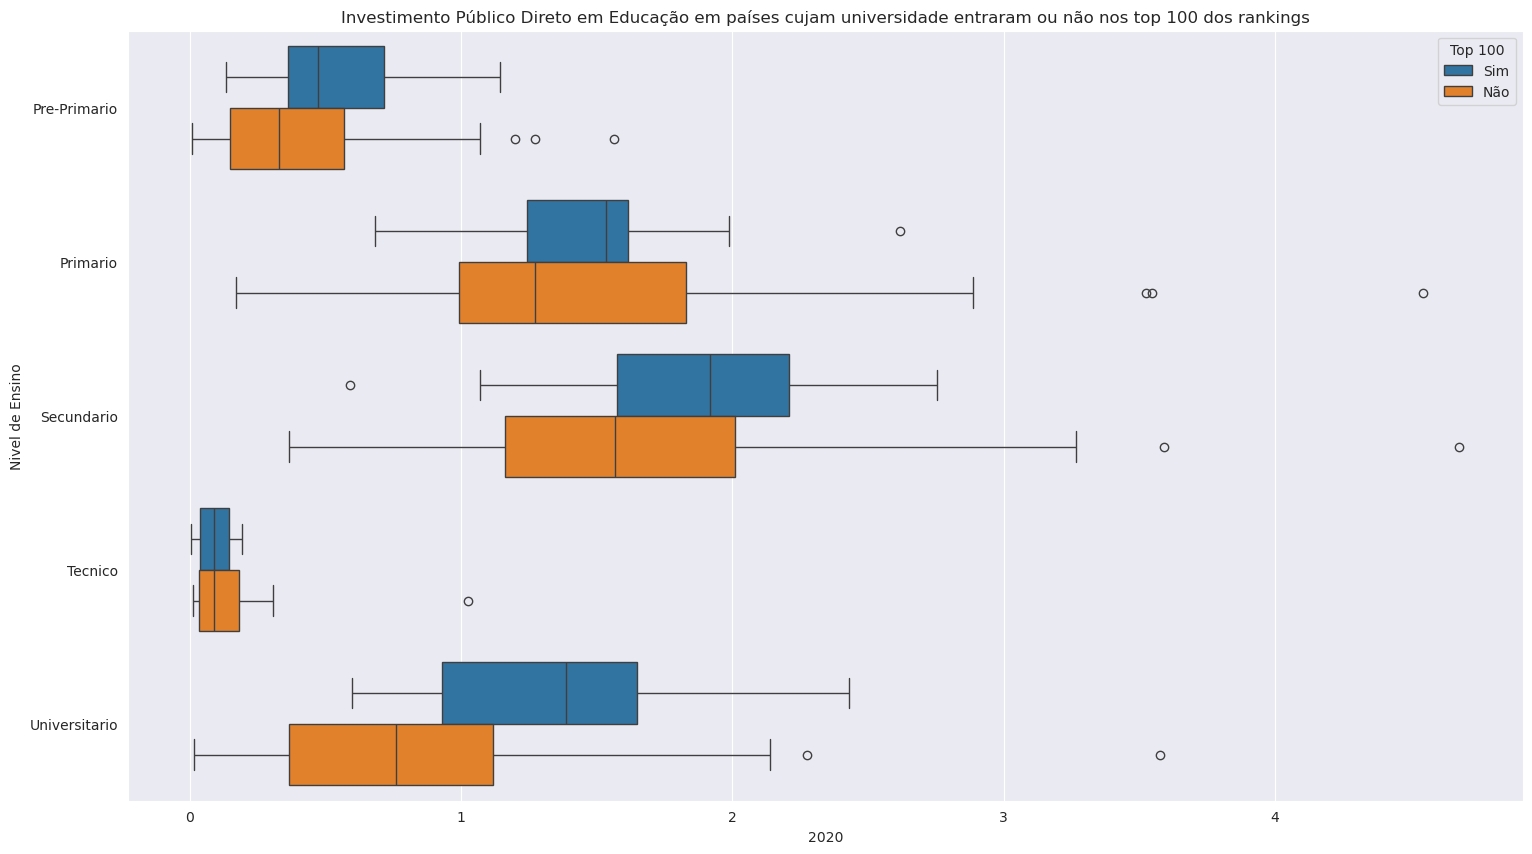

In [150]:
#Box plot

ano_plotagem=2020
fig=plt.figure(figsize=(18,10))
sns.boxplot(data=investimento_porcentagem_PIB_fora_dentro_top100,x=ano_plotagem,y='Nivel de Ensino',hue='Top 100')
plt.title("Investimento Público Direto em Educação em países cujam universidade entraram ou não nos top 100 dos rankings")

In [153]:
[investimento_porcentagem_PIB_fora_dentro_top100['Nivel de Ensino']=='Secundario']

,Country,2017,2018,2019,2020,2021,2022,2023,Nivel de Ensino,Codigo Paises,Ranking THE,Ranking QS,Ranking Shanghai,Top 100
50,Belgium,2.63166,2.58766,2.53937,2.75578,NaN,NaN,NaN,Secundario,BEL,1.0,1.0,2.0,Sim
51,Brazil,2.51812,2.42979,2.35016,2.26348,NaN,NaN,NaN,Secundario,BRA,0.0,1.0,0.0,Sim
52,France,2.34572,2.31282,2.28051,2.41673,NaN,NaN,NaN,Secundario,FRA,4.0,4.0,4.0,Sim
53,Norway,2.19640,2.16597,2.23675,2.37505,NaN,NaN,NaN,Secundario,NOR,0.0,0.0,1.0,Sim
54,Argentina,2.15660,1.78316,1.73763,2.00686,1.72876,NaN,NaN,Secundario,ARG,0.0,1.0,0.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ABW,NaN,NaN,NaN,Não
884,Anguilla,NaN,1.19300,0.99800,1.42500,1.28500,NaN,NaN,Secundario,AIA,NaN,NaN,NaN,Não
885,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,ASM,NaN,NaN,NaN,Não
886,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secundario,DZA,NaN,NaN,NaN,Não


## Investimento público direto em educação (em U$S)

- Dados com o investimento público direto total em educação em cada pais entre os anos de 2017 e 2023

In [160]:
investimento_em_milhoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        279 non-null    object 
 1   2017           123 non-null    float64
 2   2018           110 non-null    float64
 3   2019           90 non-null     float64
 4   2020           80 non-null     float64
 5   2021           43 non-null     float64
 6   2022           24 non-null     float64
 7   2023           0 non-null      float64
 8   Codigo Paises  238 non-null    object 
dtypes: float64(7), object(2)
memory usage: 19.7+ KB


In [161]:
investimento_em_milhoes.head(40)

,Country,2017,2018,2019,2020,2021,2022,2023,Codigo Paises
0,United States of America,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN,USA
1,Germany,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN,DEU
2,France,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN,FRA
3,United Kingdom,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN,GBR
4,India,1.034359e+05,1.119603e+05,1.064470e+05,1.218034e+05,123832.22685,NaN,NaN,IND
5,Brazil,9.965816e+04,9.771295e+04,9.687459e+04,9.068384e+04,NaN,NaN,NaN,BRA
6,Italy,8.660117e+04,9.196647e+04,8.891802e+04,8.778524e+04,NaN,NaN,NaN,ITA
7,Russian Federation,7.975156e+04,8.178568e+04,NaN,NaN,NaN,NaN,NaN,RUS
8,Canada,7.978509e+04,8.103382e+04,8.130717e+04,8.483874e+04,NaN,NaN,NaN,CAN
9,Republic of Korea,7.204225e+04,7.636077e+04,8.204228e+04,8.349583e+04,NaN,NaN,NaN,KOR


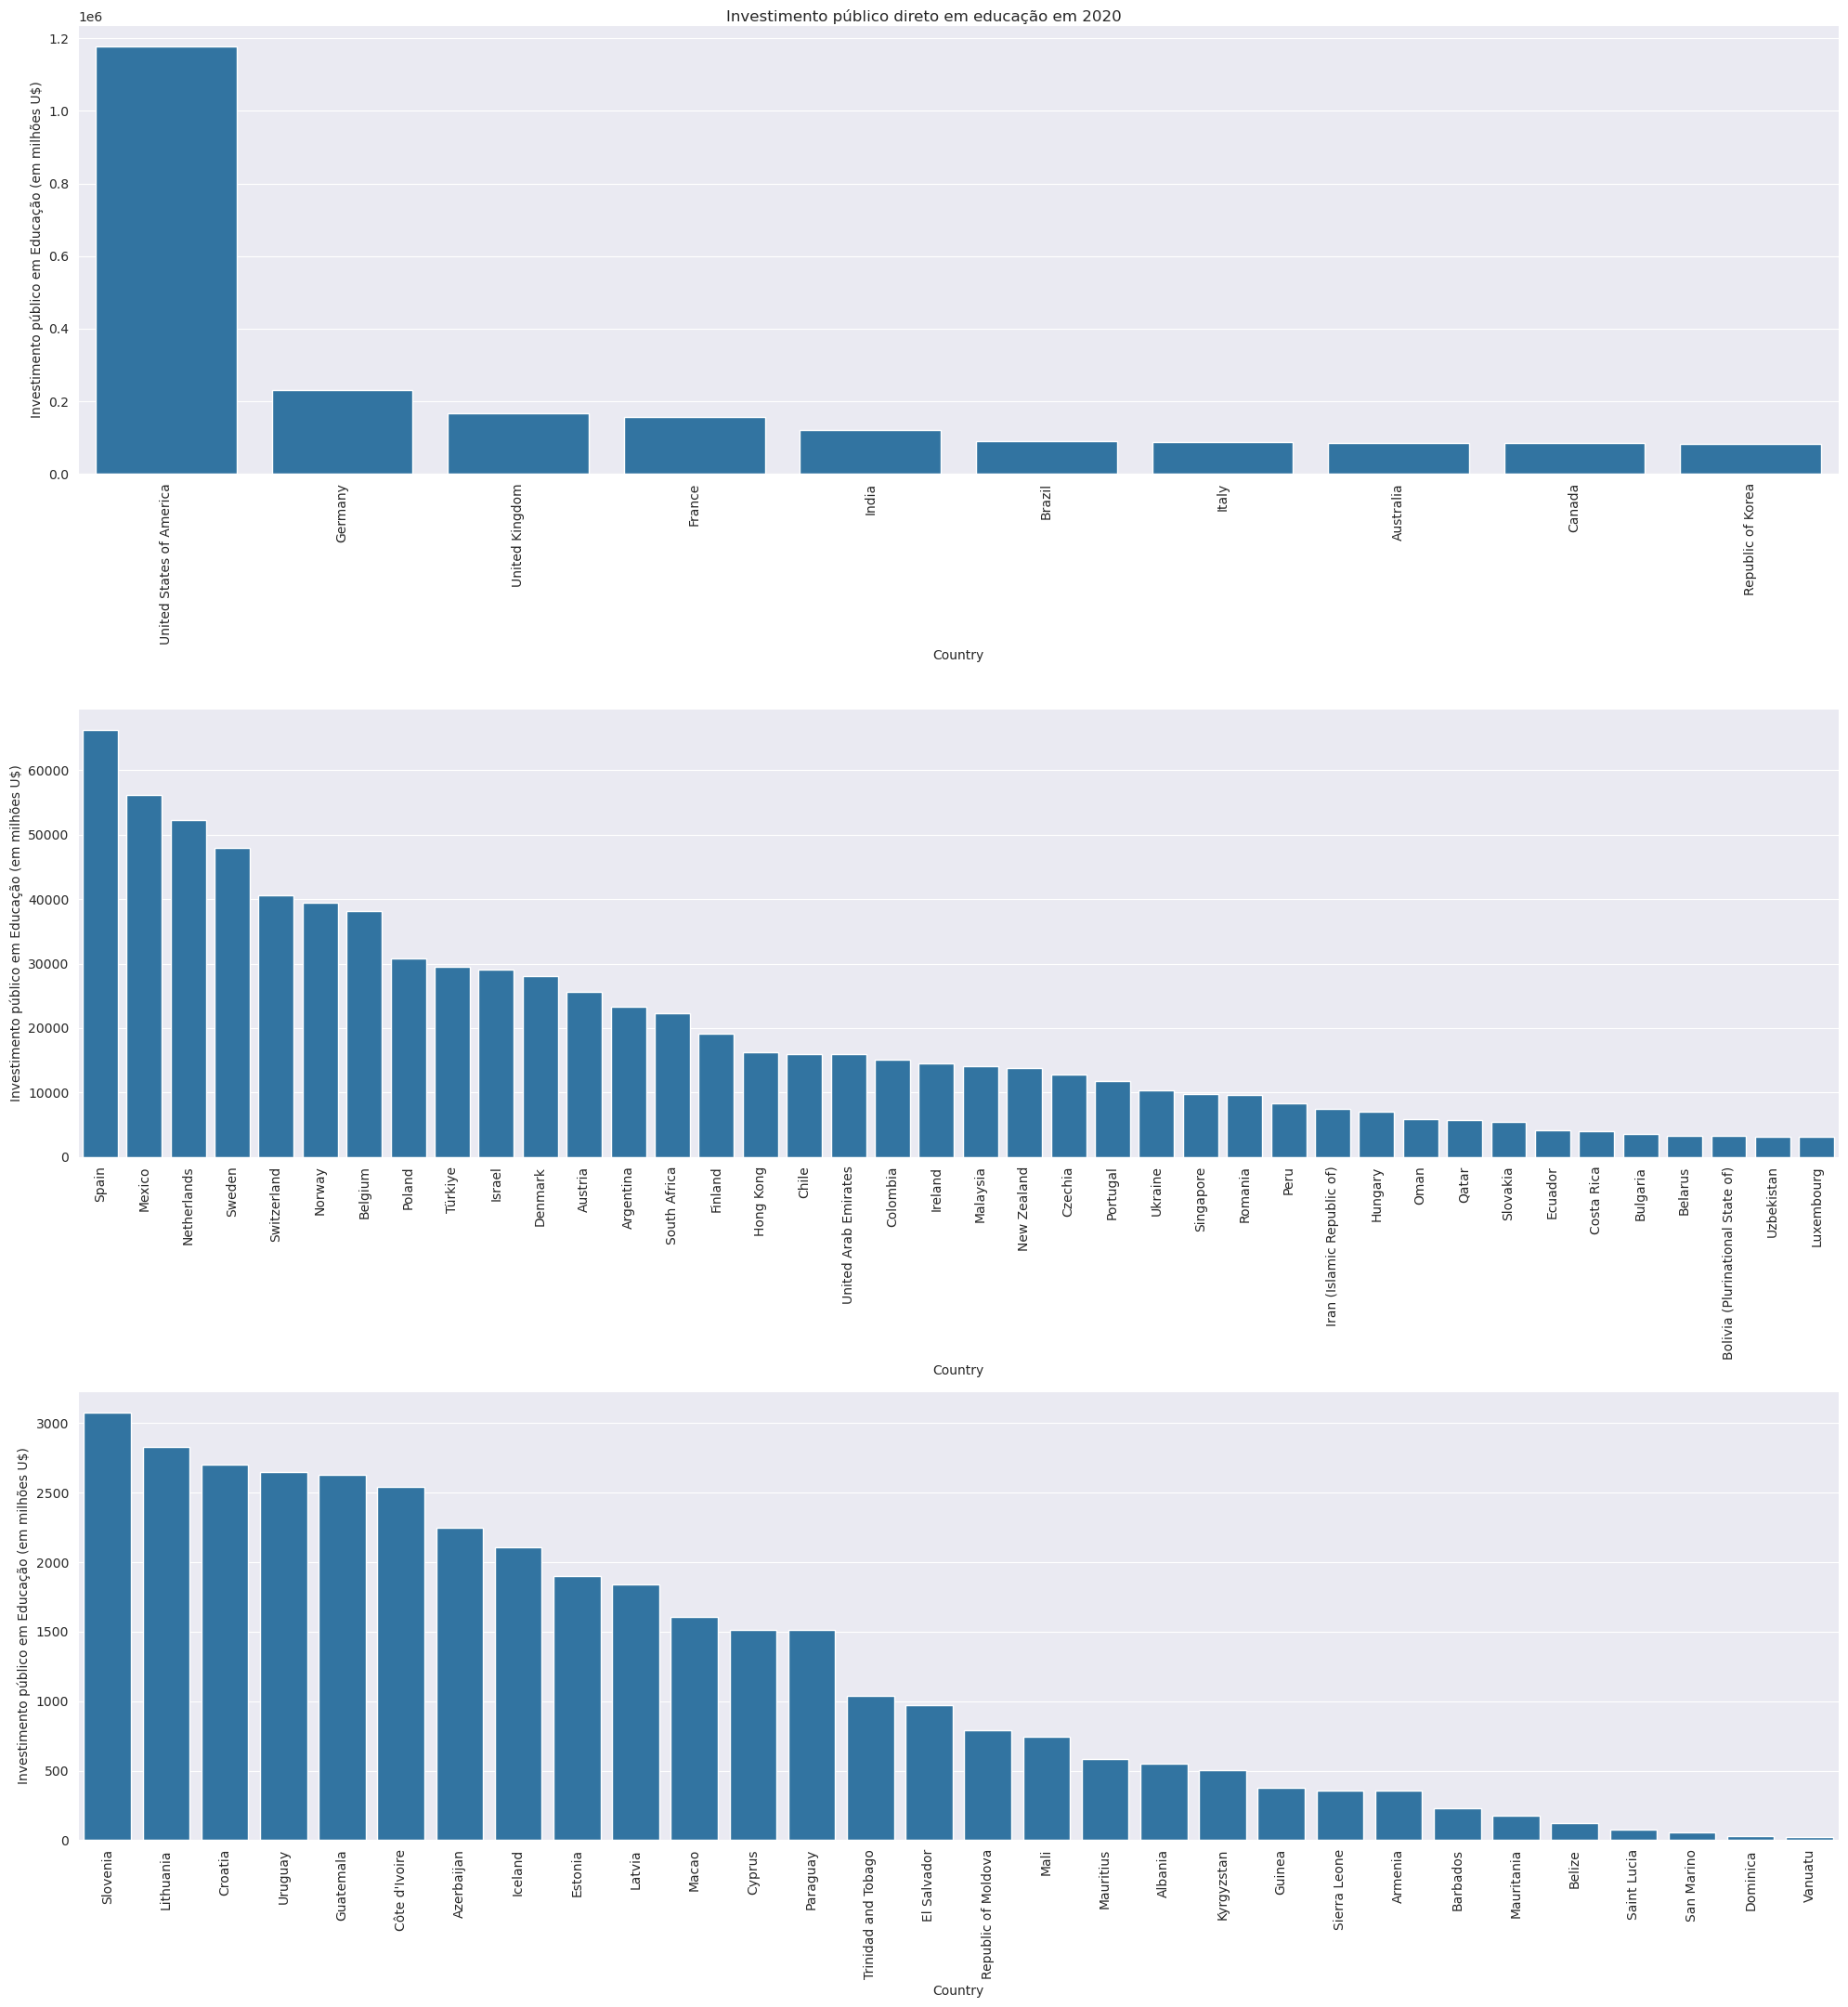

In [162]:
#Plotagem de um barplot com os investimentos dos paises
#Necessaŕio dividir em subplots devido a diferença dos valores, porque a discrepância nos valores ocultaria valores menores

#selecionar o ano para plotagem dos dados
ano=2020 #2017,2018,2019 ou 2020. Poucos dados para os anos mais recentes

n_rows=3
n_cols=1
fig,axs=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,22))
fig.suptitle("Investimento público direto em educação em {}".format('2020'))
#plt.xticks(rotation=90)
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[0:10,:],x="Country",y=ano,ax=axs[0])
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[10:50,:],x="Country",y=ano,ax=axs[1])
sns.barplot(data=investimento_em_milhoes.sort_values(by=ano,ascending=False).dropna(subset=ano).iloc[50:,:],x="Country",y=ano,ax=axs[2])

for num in range(n_rows):
    axs[num].tick_params('x',labelrotation=90)
    axs[num].set_ylabel("Investimento público em Educação (em milhões U$)")
fig.tight_layout()

Text(0.5, 0, 'Investimento público em educação em 2017(em milhões US$)')

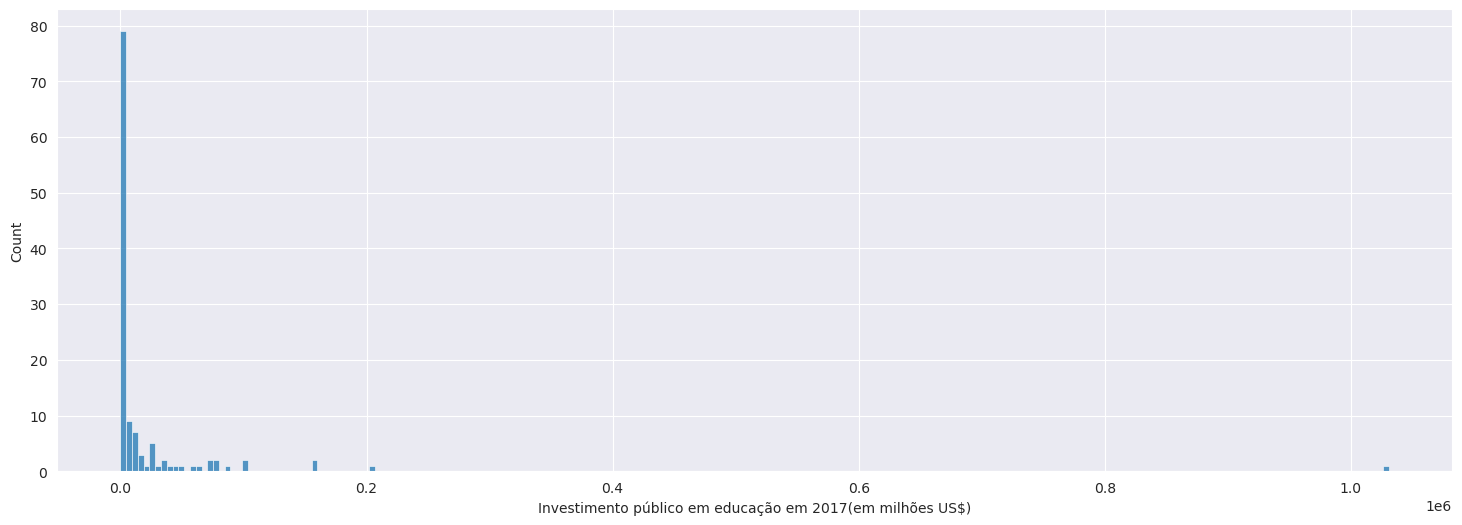

In [163]:
#Plotagem da distribuição do investimento público em educação

ano=2017
plt.figure(figsize=(18,6))
sns.histplot(data=investimento_em_milhoes.dropna(subset=ano),x=ano)
plt.xlabel("Investimento público em educação em {}(em milhões US$)".format(ano))

In [164]:
investimento_em_milhoes.describe()

,2017,2018,2019,2020,2021,2022,2023
count,1.230000e+02,1.100000e+02,9.000000e+01,8.000000e+01,43.000000,24.000000,0.0
mean,2.387763e+04,2.684942e+04,3.218996e+04,3.870833e+04,6404.104264,3035.088808,NaN
std,9.743421e+04,1.014358e+05,1.156730e+05,1.354896e+05,19215.505935,5211.677181,NaN
min,2.401698e+01,2.570002e+01,1.802643e+01,2.098332e+01,23.902220,18.381140,NaN
25%,5.713157e+02,5.549800e+02,1.065614e+03,1.781900e+03,439.548085,343.037185,NaN
50%,2.014261e+03,2.387525e+03,4.575351e+03,6.474433e+03,1039.063720,777.849190,NaN
75%,1.232280e+04,1.566184e+04,2.070326e+04,2.831783e+04,3213.327275,3135.813155,NaN
max,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,123832.226850,21902.325080,NaN


In [165]:
#Criação de dois dataframes, um deles com o investimento em paises com universidades nos top100 e outro cujas universidades não entraram no top 100

investimento_total_location_top100=investimento_em_milhoes.join(location_top_100_codigos_paises.set_index('Codigo Paises'),on='Codigo Paises',how='left')
investimento_total_location_dentro_top_100=investimento_total_location_top100.dropna(subset='Ranking THE')
investimento_total_location_fora_top_100=investimento_total_location_top100[investimento_total_location_top100['Ranking THE'].isnull()]

In [166]:
investimento_total_location_dentro_top_100.sort_values(by=2020,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Codigo Paises,Ranking THE,Ranking QS,Ranking Shanghai
0,United States of America,1.030586e+06,1.013791e+06,1.056013e+06,1.177315e+06,NaN,NaN,NaN,USA,36.0,25.0,38.0
1,Germany,2.057727e+05,2.123767e+05,2.205447e+05,2.319347e+05,NaN,NaN,NaN,DEU,8.0,5.0,4.0
3,United Kingdom,1.559646e+05,1.529158e+05,1.570384e+05,1.671267e+05,NaN,NaN,NaN,GBR,11.0,15.0,8.0
2,France,1.577995e+05,1.594327e+05,1.607873e+05,1.572263e+05,NaN,NaN,NaN,FRA,4.0,4.0,4.0
5,Brazil,9.965816e+04,9.771295e+04,9.687459e+04,9.068384e+04,NaN,NaN,NaN,BRA,0.0,1.0,0.0
10,Australia,7.427541e+04,7.620985e+04,7.801628e+04,8.517789e+04,NaN,NaN,NaN,AUS,6.0,9.0,6.0
8,Canada,7.978509e+04,8.103382e+04,8.130717e+04,8.483874e+04,NaN,NaN,NaN,CAN,3.0,4.0,5.0
9,Republic of Korea,7.204225e+04,7.636077e+04,8.204228e+04,8.349583e+04,NaN,NaN,NaN,KOR,3.0,5.0,1.0
12,Mexico,5.851941e+04,5.630956e+04,NaN,5.622390e+04,NaN,NaN,NaN,MEX,0.0,1.0,0.0
13,Netherlands,4.978040e+04,5.275309e+04,5.179915e+04,5.233301e+04,NaN,NaN,NaN,NLD,6.0,2.0,3.0


In [167]:
investimento_total_location_fora_top_100.sort_values(by=2020,ascending=False)

,Country,2017,2018,2019,2020,2021,2022,2023,Codigo Paises,Ranking THE,Ranking QS,Ranking Shanghai
4,India,103435.93486,111960.25781,106446.97069,121803.35176,123832.22685,NaN,NaN,IND,NaN,NaN,NaN
6,Italy,86601.17354,91966.46982,88918.02078,87785.23587,NaN,NaN,NaN,ITA,NaN,NaN,NaN
11,Spain,61501.50720,62517.07385,64531.28686,66281.35519,NaN,NaN,NaN,ESP,NaN,NaN,NaN
19,Poland,26829.81812,28613.85264,30365.83914,30857.87685,NaN,NaN,NaN,POL,NaN,NaN,NaN
18,Türkiye,30058.39041,30784.76805,32137.07561,29484.36351,NaN,NaN,NaN,TUR,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
273,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGO,NaN,NaN,NaN
274,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM,NaN,NaN,NaN
275,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DZA,NaN,NaN,NaN
277,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALA,NaN,NaN,NaN


In [168]:
#Estatísticas para o investimento direto em educação (em US$)
#Países com universidades no top 100

investimento_total_location_dentro_top_100.describe().iloc[:,:7].style.format(thousands=',',precision=2)

,2017,2018,2019,2020,2021,2022,2023
count,23.00,24.00,22.00,23.00,4.00,1.00,0.00
mean,"102,990.49","99,070.56","104,943.52","109,448.40","15,118.55","13,691.96",nan
std,"208,700.09","201,729.05","219,677.56","239,592.08","5,379.79",nan,nan
min,"11,638.84","9,866.86","9,766.04","9,742.93","9,872.03","13,691.96",nan
25%,"26,022.67","22,401.03","18,582.69","19,781.04","12,817.10","13,691.96",nan
50%,"44,966.37","42,318.14","38,525.73","40,650.83","13,978.91","13,691.96",nan
75%,"79,768.32","81,221.79","81,858.50","85,008.31","16,280.36","13,691.96",nan
max,"1,030,585.97","1,013,790.53","1,056,013.45","1,177,315.08","22,644.36","13,691.96",nan


In [169]:
#Estatísticas para o investimento direto em educação (em US$)
#Países sem universidades no top 100

investimento_total_location_fora_top_100.describe().iloc[:,:7].style.format(thousands=',',precision=2)

,2017,2018,2019,2020,2021,2022,2023
count,100.00,86.00,68.00,57.00,39.00,23.00,0.00
mean,"5,681.67","6,694.68","8,652.04","10,164.09","5,510.31","2,571.75",nan
std,"15,212.02","17,297.54","18,647.20","21,465.19","19,924.96","4,796.83",nan
min,24.02,25.70,18.03,20.98,23.90,18.38,nan
25%,327.92,411.85,672.54,793.35,392.68,298.77,nan
50%,"1,151.91","1,312.73","2,538.69","2,827.89",842.61,773.59,nan
75%,"3,146.25","4,131.46","7,584.92","8,379.32","2,691.72","2,795.69",nan
max,"103,435.93","111,960.26","106,446.97","121,803.35","123,832.23","21,902.33",nan


In [170]:
#Criação de coluna para permitir concatenação de dataframes

investimento_total_location_dentro_top_100.loc[:,['Top 100']]='Sim'
investimento_total_location_fora_top_100.loc[:,['Top 100']]='Não'


In [172]:
#Dataframe com dados de investimento público direto em educação (em milhões US$) para todos os países
#Datadrame conta com coluna indicando se o país tem ou não universiadde no top 100 de algum dos três rankings

investimento_dentro_fora_top100=pd.concat([investimento_total_location_dentro_top_100,
                                       investimento_total_location_fora_top_100],axis=0).reset_index(drop=True)

Text(0.5, 1.0, 'Investimento público direto em educação (em milhões de U$S) no ano de 2020')

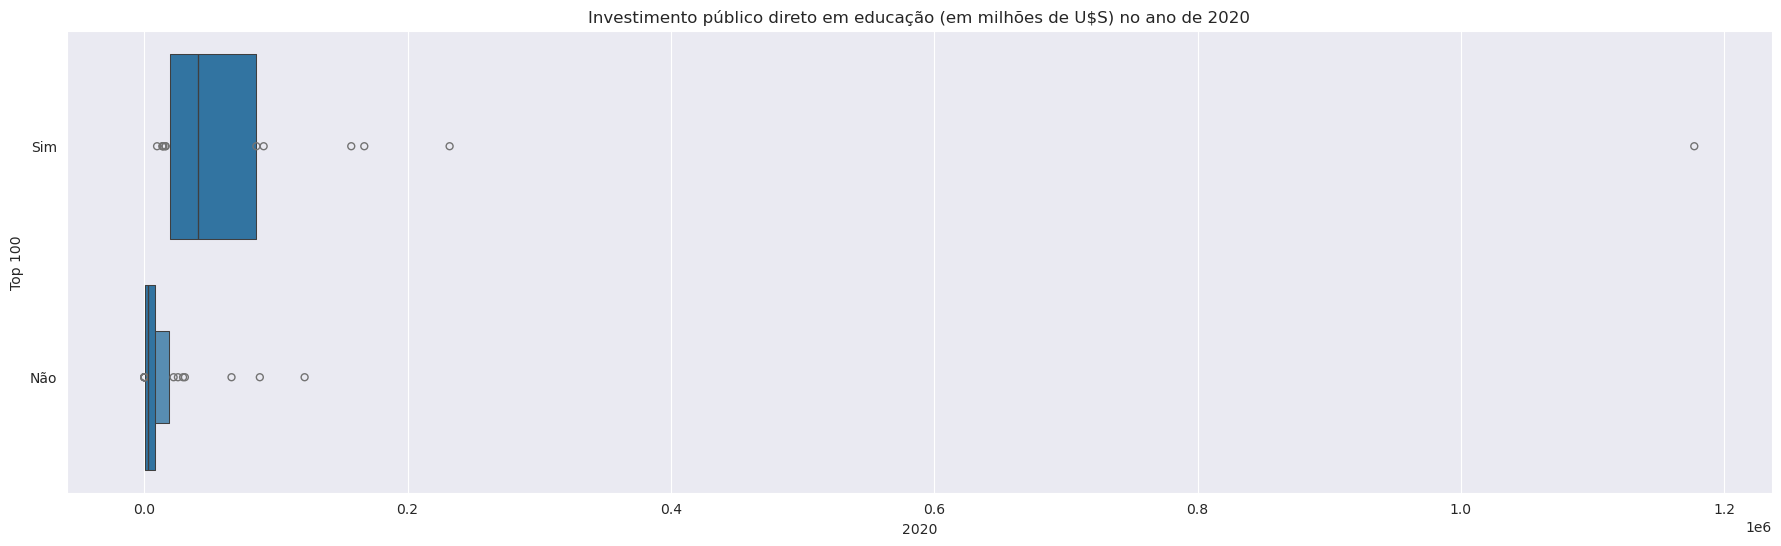

In [179]:
#Box plot para o investimento total para países com e sem universidades no top 100

ano_selecionado=2020
plt.figure(figsize=(22,6))
sns.boxenplot(data=investimento_dentro_fora_top100,x=ano_selecionado,y='Top 100')
plt.title('Investimento público direto em educação (em milhões de U$S) no ano de {}'.format(ano_selecionado))

In [174]:
#Divisões dos investimentos em cinco categorias para facilitar visualização

labels=['Very Low','Low','Medium','High','Very High']
ano_nivel_investimento=2017
investimento_em_milhoes.loc[:,['Níveis de Investimento']]=pd.qcut(investimento_em_milhoes[ano_nivel_investimento],q=5,labels=labels)

In [175]:
#Plotar mapa múndi com paises coloridos de acordo com a categoria de investimento

fig = px.choropleth(investimento_em_milhoes, locations='Codigo Paises', color='Níveis de Investimento'
,hover_name='Country',
            projection='natural earth')
title='Total de investimentos públicos em educação por categorias em  {}'.format(ano_nivel_investimento) #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.85) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()

## Investimentos públicos e privados diretos em educação como proporção do PIB



In [182]:
investimentos_publicos_privados.head()

,Country,Ano,Investimentos Governamentais Totais,Investimentos Privados Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior,Investimentos Privados em Educacao Superior,Codigo Paises
0,OECD average,2005,4.3,NaN,3.3,NaN,1.0,NaN,None
1,Australia,2005,3.9,NaN,3.2,NaN,0.7,NaN,AUS
2,Austria,2005,NaN,NaN,NaN,NaN,NaN,NaN,AUT
3,Belgium,2005,5.0,NaN,3.9,NaN,1.1,NaN,BEL
4,Canada,2005,4.4,NaN,3.1,NaN,1.3,NaN,CAN


In [165]:
investimentos_publicos_privados['Ano'].unique()

array([2005, 2010, 2015, 2018, 2019, 2020])

In [183]:
# Analisar os dados mais recentes (2020)
#Gastos Públicos

investimentos_publicos_2020=investimentos_publicos_privados.loc[investimentos_publicos_privados["Ano"]==2020,['Country','Investimentos Governamentais Totais',
                                                                                                            'Investimentos Governamentais em Educacao Elementar e Secundaria',
                                                                                                            'Investimentos Governamentais em Educacao Superior']].reset_index(drop=True)
investimentos_publicos_2020


,Country,Investimentos Governamentais Totais,Investimentos Governamentais em Educacao Elementar e Secundaria,Investimentos Governamentais em Educacao Superior
0,OECD average,4.3,3.3,1.0
1,Australia,4.4,3.7,0.7
2,Austria,4.6,3.0,1.6
3,Belgium,5.6,4.2,1.4
4,Canada,4.6,3.4,1.2
5,Chile,4.2,3.1,1.1
6,Colombia,4.6,4.1,0.5
7,Costa Rica,5.8,4.4,1.4
8,Czech Republic,4.0,3.1,0.8
9,Denmark,5.3,3.7,1.6


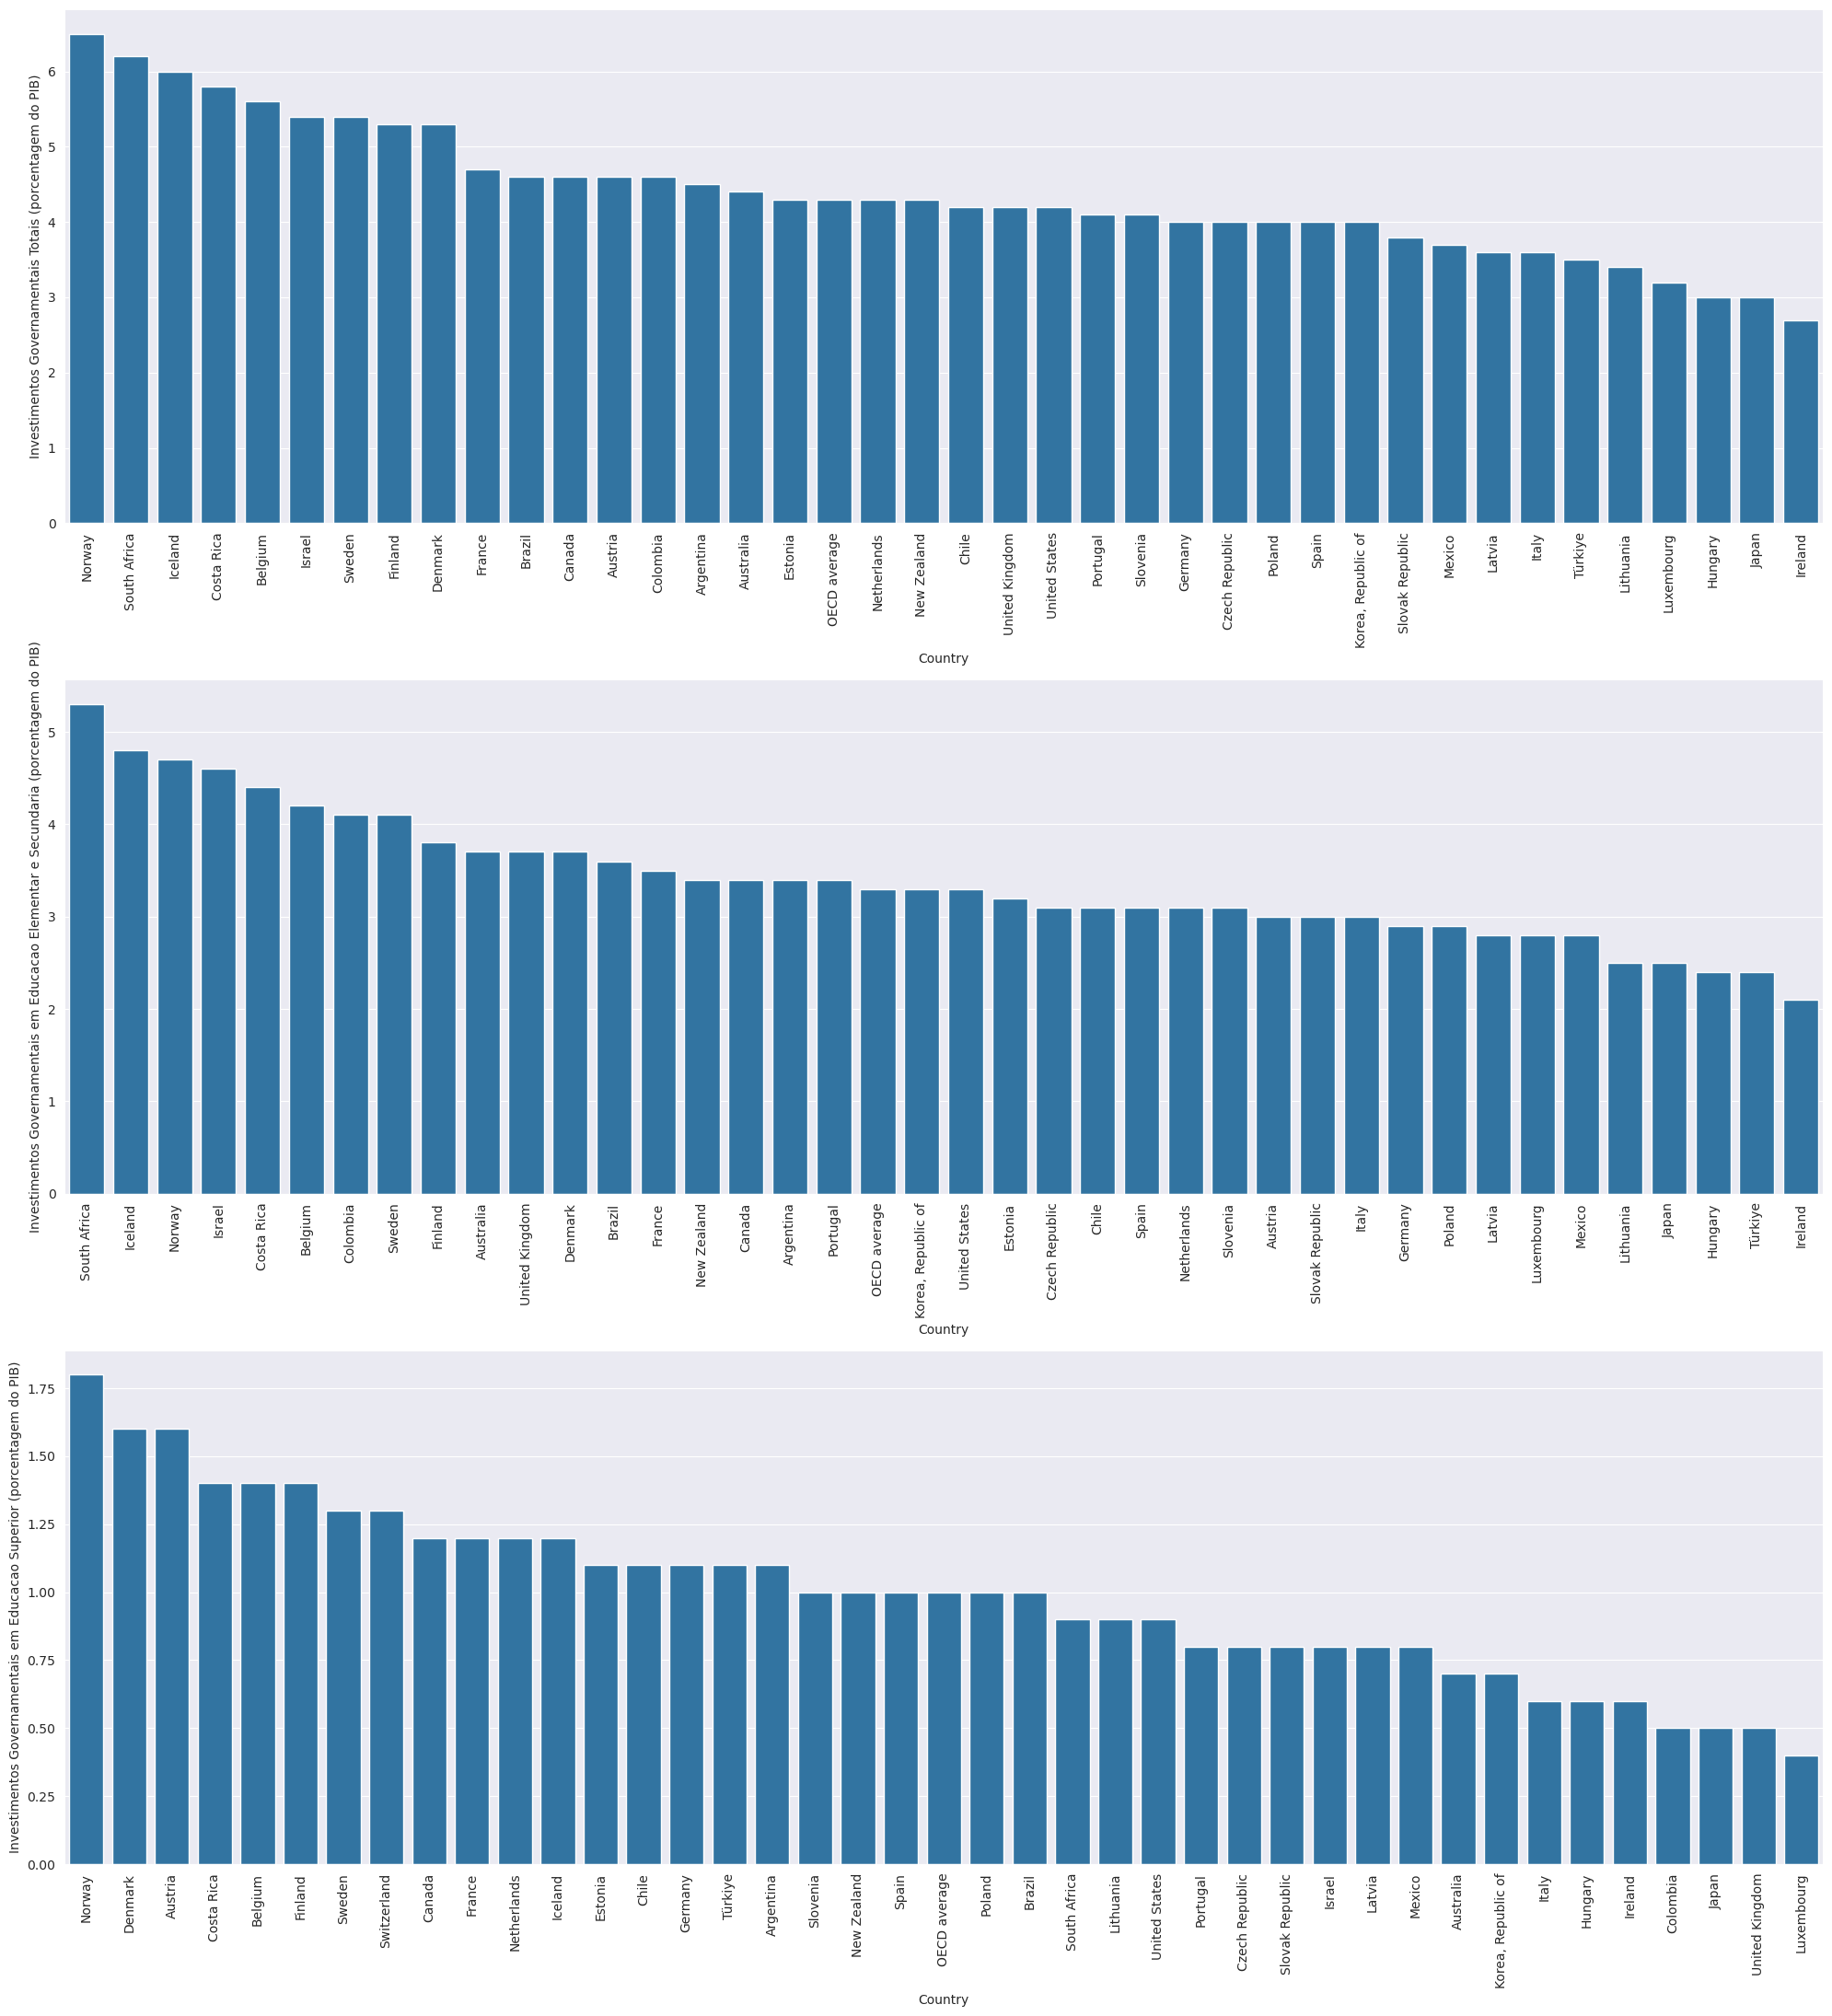

In [184]:
#Plotar barplot com o investimento publico em educação (porcentagem do PIB)

n_rows=3
n_cols=1

colunas=['Investimentos Governamentais Totais',
        'Investimentos Governamentais em Educacao Elementar e Secundaria',
        'Investimentos Governamentais em Educacao Superior']

fig,axs=plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,22))
#plt.xticks(rotation=90)
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[0],ascending=False).dropna(subset=colunas[0]),
                                                    x="Country",y=colunas[0],ax=axs[0])
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[1],ascending=False).dropna(subset=colunas[1]),
                                                    x="Country",y=colunas[1],ax=axs[1])
sns.barplot(data=investimentos_publicos_2020.sort_values(by=colunas[2],ascending=False).dropna(subset=colunas[2]),
                                                    x="Country",y=colunas[2],ax=axs[2])



for num in range(n_rows):
    axs[num].tick_params('x',labelrotation=90)
    axs[num].set_ylabel(colunas[num]+" (porcentagem do PIB)")
fig.tight_layout()




Text(0, 0.5, 'Investimentos públicos direstos em educação como proporção do PIB')

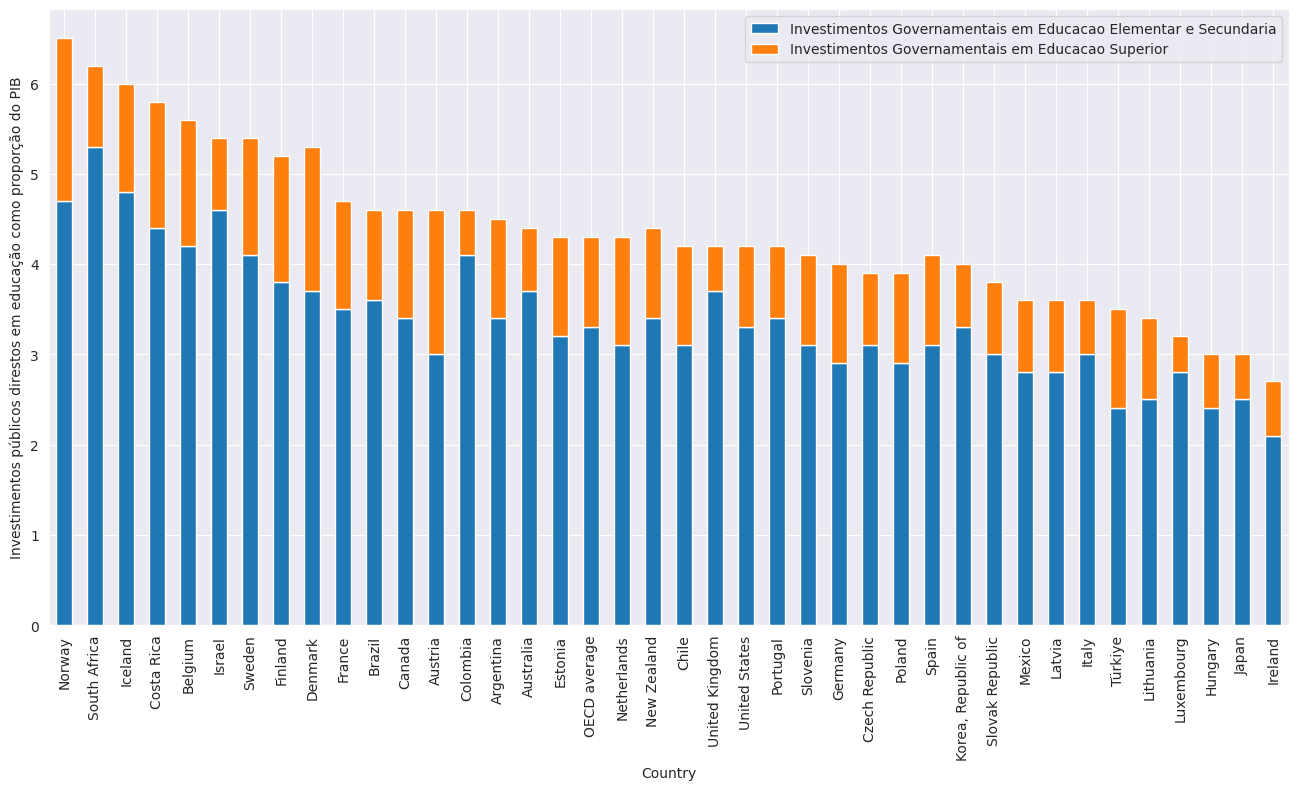

In [185]:
#Plotagem dos investimentos públicos em educação elementar+secundária e educação superior

colunas=['Country','Investimentos Governamentais em Educacao Elementar e Secundaria','Investimentos Governamentais em Educacao Superior']
investimentos_publicos_2020.sort_values(by='Investimentos Governamentais Totais',inplace=True,ascending=False)
investimentos_publicos_2020.loc[:,colunas].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel("Investimentos públicos direstos em educação como proporção do PIB")


In [186]:
#Investimento privado direto em educação em 2020

investimentos_privados_2020=investimentos_publicos_privados.loc[investimentos_publicos_privados["Ano"]==2020,['Country','Investimentos Privados Totais',
                                                                                                            'Investimentos Privados em Educacao Elementar e Secundaria',
                                                                                                            'Investimentos Privados em Educacao Superior']].reset_index(drop=True)

In [187]:
investimentos_privados_2020

,Country,Investimentos Privados Totais,Investimentos Privados em Educacao Elementar e Secundaria,Investimentos Privados em Educacao Superior
0,OECD average,0.8,0.3,0.5
1,Australia,1.9,0.7,1.2
2,Austria,0.3,0.1,0.2
3,Belgium,0.3,0.1,0.2
4,Canada,1.4,0.3,1.2
5,Chile,2.3,0.7,1.6
6,Colombia,2.0,1.0,1.0
7,Costa Rica,NaN,NaN,0.1
8,Czech Republic,0.4,0.2,0.2
9,Denmark,0.4,0.2,0.2


Text(0, 0.5, 'Investimentos privados diretos em educação como proporção do PIB')

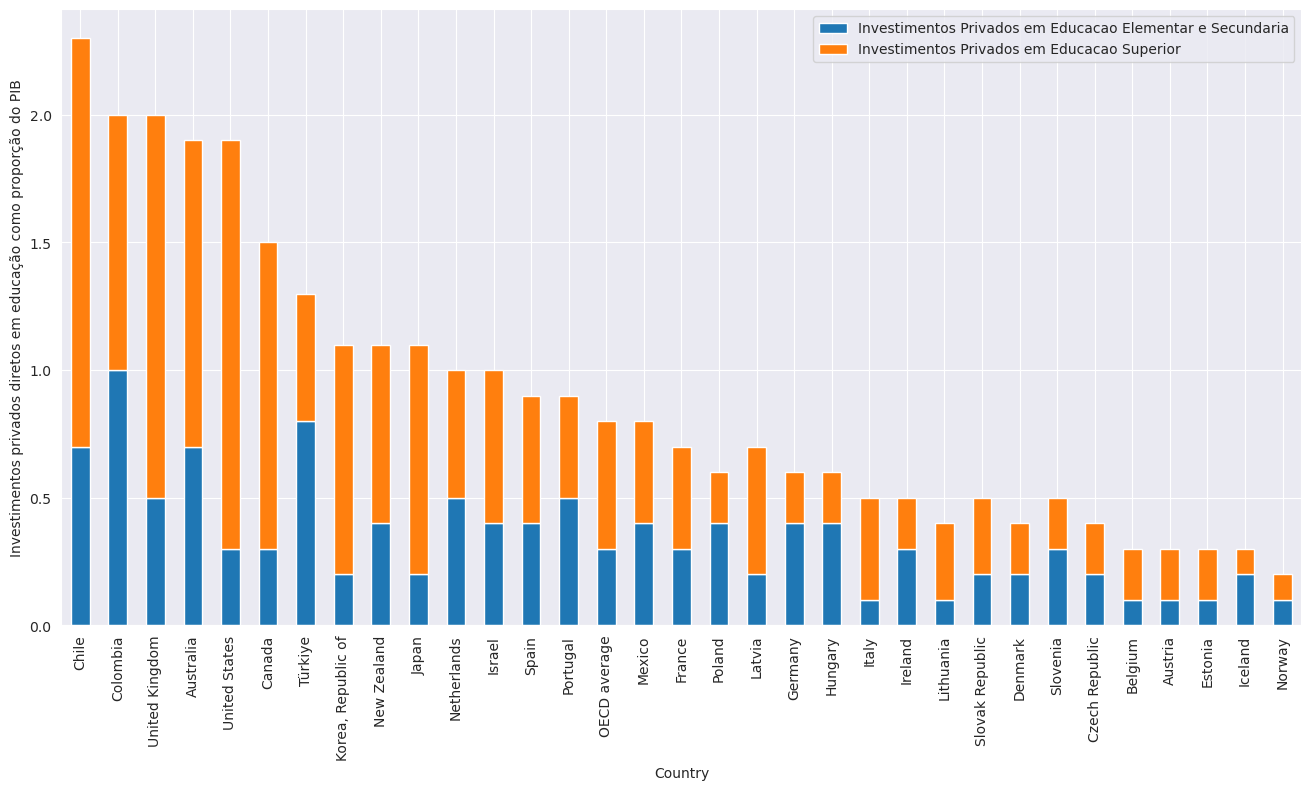

In [188]:
#Plotagem dos gastos privados em educação elementar+secundária e educação superior

colunas=['Country','Investimentos Privados em Educacao Elementar e Secundaria','Investimentos Privados em Educacao Superior']
investimentos_privados_2020.sort_values(by='Investimentos Privados Totais',inplace=True,ascending=False)
investimentos_privados_2020.loc[:,colunas].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))
plt.ylabel("Investimentos privados diretos em educação como proporção do PIB")



<Axes: xlabel='Country'>

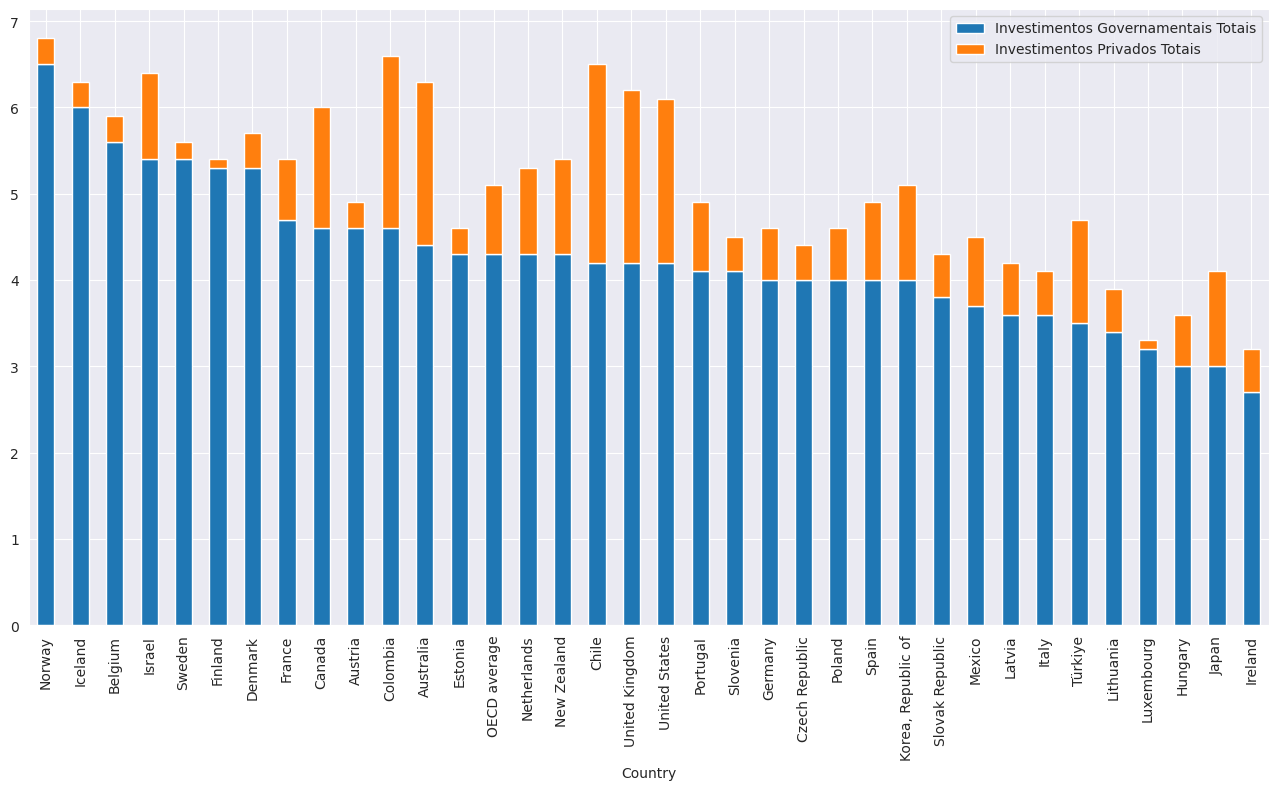

In [189]:
#Plotagem Gastos Governamentais Totais e Gastos Privados Totais

investimentos_publicos_privados_2020=investimentos_publicos_privados[investimentos_publicos_privados['Ano']==2020]
investimentos_publicos_privados_2020=investimentos_publicos_privados_2020.sort_values(by='Investimentos Governamentais Totais',ascending=False)
investimentos_publicos_privados_2020.loc[:,['Country','Investimentos Governamentais Totais','Investimentos Privados Totais']].set_index('Country').dropna().plot(kind='bar',stacked=True,figsize=(16,8))